<center> 
    <img src="figs/facens-logo.png" alt="Logo Facens" width="200" align="center"/>
    <br/>
    <font size="3">Centro Universitário FACENS</font>
    <br/>
    <font size="4">Especialização em Inteligência Artificial Aplicada</font>
</center>
<br/>
<font size="4"><center><b>TCC - Sistema de Recomendação de Jogos Eletrônicos Online utilizando uma Taxa de Confiança</b></center></font>
<font size="4"><center><b>Aluno</b>: André Luiz Pereira - <b>RA</b>: 191516</center></font>
<font size="4"><center><b>Prof.</b>: Pedro R. Pires</center></font>
<br/>

---

## Introdução e Objetivos

Sistemas de recomendação têm o objetivo de recomendar a usuários itens de seus interesses, afim de mantê-los satisfeitos e garantir que continuem usando o sistema em questão. Sugerir itens que para um determinado usuário seja de grande valia não é uma tarefa fácil.

Nesse trabalho, serão aplicadas técnicas de Aprendizado de Máquina da área de Sistemas de Recomendação, com objetivo de recomendar items relevantes aos usuários do sistema. Será abordado um cenário específico de recomendação de jogos eletrônicos (_games_) com dados da Steam, maior empresa de distribuição digital de jogos para computador. O objetivo deste trabalho é aplicar diferentes algoritmos de Sistemas de Recomendação na base de jogos eletrônicos e analisar seu resultado. 

Adicionalmente, foram propostas três formas de quantificar a satisfação de um usuário com um jogo, nomeadas de **taxas de confiança**, com o intuito de melhorar os resultados obtidos. As taxas foram calculadas e alimentadas aos algoritmos, com o propósito de avaliar e comparar o comportamento dos algoritimos com e sem taxa de confiança, verificando sua capacidade em sugerir jogos que os usuários vão jogar e gostar. 

Através de experimentos, este trabalho tem como objetivo adicional verificar se há algoritmos que apresentem melhor desempenho através do uso das taxas de confiança, e validar a sugestão do uso desta taxa. Embora o conceito de taxas de confiança já tenha sido aplicado em estudos de Sistemas de Recomendação [(HU _et al._, 2008)](https://ieeexplore.ieee.org/abstract/document/4781121), a maneira de calcular proposta neste trabalho é nova, e a técnica não foi aplicada no domínio de recomendação de jogos.

---

## Recomendação de Jogos Eletrônicos

A área de jogos eletrônicos movimentou cerca de U\$159 bilhões de dólares no ano de 2020 [(FIELD LEVEL MEDIA, 2020)](https://www.reuters.com/article/esports-business-gaming-revenues-idUSFLM8jkJMl), se caracterizando como uma área econômica bastante relevante e em crescimento.

A [Steam](https://store.steampowered.com), plataforma de distribuição de jogos eletrônicos que [detém mais de 70\% do mercado](https://en.wikipedia.org/wiki/Digital_distribution_of_video_games), foi, em 2020, responsável por adicionar e distribuir em sua plataforma [mais de 10 mill jogos eletrônicos](https://en.wikipedia.org/wiki/Steam_(service)). Com esta enorme quantidade de produtos, se faz necessário ferramentas responsáveis por filtrar e recomendar jogos que sejam relevantes para os usuários da plataforma.

<center> 
    <img src="figs/steam_games_added_chart.png" alt="Steam gráfico de jogos adicionados" width="600" align="center"/>
</center>

A Steam disponibiliza parte dos dados de seu sistema, compondo uma base de dados real e com grande volume de dados. Contendo 200 mil interações entre usuários e jogos, a base pode ser obtida através do [Kaggle](https://www.kaggle.com/tamber/steam-video-games). Através das interações, o usuário pode ter comprado o jogo ou jogado online. Para o escopo deste trabalho, é desejado estudar o comportamento dos algoritmos levando em consideração somente os jogos jogados de forma online.

---

<b>Fontes foram analisados com o propósito de aprofundamento no assunto e entendimento de como os algoritmos de recomendação funcionam, de forma geral, sem se restringir ao domínio de jogos.</b>

<h3>Filtragem Colaborativa</h3>

[_How companies use collaborative filtering to learn exactly what you want_ (ARASANIPALAI, 2019)
](https://medium.com/free-code-camp/how-companies-use-collaborative-filtering-to-learn-exactly-what-you-want-a3fc58e22ad9):  consultado para entender melhor como funcionam a filtragem colaborativa e entender como uma empresa como a Valve (responsável pela plataforma Steam) aprende sobre seus usuários para recomendar jogos para os mesmos. 

A Valve ainda está evoluindo o seu algoritmo de recomendação, e introduziu recentemente um novo sistema de recomendação baseado em filtragem colaborativa [(MIX, 2020)](https://thenextweb.com/apps/2020/02/14/steam-play-next-recommendation-algorithm/). Através de seu [_web site_](https://store.steampowered.com/), é possível verificar que a Steam [recomenda jogos em destaque e jogados por amigos](https://store.steampowered.com/recommended/). A plataforma ainda possui um algoritmo de recomendação interativo que utiliza filtragem colaborativa para recomendar jogos para seus usuários baseando-se em jogadores com preferências similares [(ROBERTSON, 2019)](https://www.theverge.com/2019/7/11/20690231/valve-steam-labs-interactive-recommender-game-recommendation-machine-learning-tool).

<center> 
    <img src="figs/steam_recomendation.png" alt="Steam recomendação" width="600" align="center"/>
</center>


<H3>Filtragem Colaborativa vs. Baseada em Conteúdo</H3>

[_Collaborative-Filtering versus Content-based RS_ (NAGI, 2020)](https://krithikanagi.medium.com/collaborative-filtering-versus-content-based-rs-590a2ec8e7b7): consultado para esclarecimento de quando usar algoritmos de filtragem colaborativa e quando usar algoritmos baseados em conteúdo. 

<H3>Similaridade entre Itens</H3>

Como serão usados algoritmos de recomendação implícita por vizinhança (KNN Implícito), que fazem uso de algoritmos de similaridade, foram estudadas métricas para cálculod e similaridade:

<b>Similaridade de Cosseno</b>

[_Using Cosine Similarity to Build a Movie Recommendation System_ (JAVED, 2020)](https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599): utilizado para entender melhor como a similaridade por cosseno funciona, já que foi pesquisado sobre filtragem colaborativa e similaridade de itens/preferências de usuários. 

<b>Similaridade Jaccard</b>

[_Jaccard Similarity_ (KARABIBER, 2021)](https://www.learndatasci.com/glossary/jaccard-similarity/): usado para entender como o algoritmo de similaridade por Jaccard funciona. A medida foi usada no KNN implícito.

<b>Similaridade de Pearson</b>

[_Correlation Coefficient: Simple Definition, Formula, Easy Steps_ (GLEN, 2021)](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/): será também usada a similaridade por correlação de Pearson, então sua fórmula e emprego em algoritmos de vizinhança foi melhor estudada.


<H2>Algoritmos abordados</H2>

Foi conduzido um estudo sobre os algoritmos aplicados neste trabalho, para melhor entendimento dos mesmos.

<b>KNN</b>

O KNN, assim como outros algoritmos baseados em vizinhança, busca gerar a recomendação com base na similaridade entre items relacionados a um dado usuário e outros items vizinhos.

[_Understanding Recommendation system and KNN with project — Book Recommendation System_ (MAKWANA, 2020)](https://aman-makwana101932.medium.com/understanding-recommendation-system-and-knn-with-project-book-recommendation-system-c648e47ff4f6): baseando-se em recomendação por filtragem colaborativa, apresenta conceitos interessantes e mostra como é uma implementação de KNN em um sistema de recomendação.


<b>SVD</b>

[_Beginner’s Guide to Creating the SVD Recommender System_ (BHATTACHARYYA, 2019)](https://towardsdatascience.com/beginners-guide-to-creating-an-svd-recommender-system-1fd7326d1f65): guia para iniciantes de como criar um sistema de recomendação baseada em SVD (_Singular Value Decomposition_). Ajuda entender como criar um sistema de recomendação através do algoritmo SVD.

<b>AutoRec</b>

[_AutoRec: Autoencoders Meet Collaborative Filtering_ (SEDHAIN _et al._, 2015)](https://users.cecs.anu.edu.au/~akmenon/papers/autorec/autorec-paper.pdf): ajuda entender o conceito por trás da implementação do AutoRec.

<b>Bayesian Personalized Ranking</b>

[_Building recommendation system based Bayesian Personalized Ranking using TensorFlow 2.1_ (BAIBAK, 2020)](https://medium.com/heyjobs-tech/building-recommendation-system-based-bayesian-personalized-ranking-using-tensorflow-2-1-b814d2704130): exemplo de uso do BPR e explicação do surgimento para resolver o problema de não haver avaliação explícita de usuário para itens.

<H3>Ajuste de Parâmetros</H3>

[_Recommender Systems and Hyper-parameter tuning_ (CANO, 2019)](https://towardsdatascience.com/recommender-systems-and-hyper-parameter-tuning-25567b10e298): foi consultado para auxiliar na descoberta dos melhores parâmetros para os algoritmos. Apresenta de forma fácil os conceitos de ajuste de parâmetros através da busca em grade.

---

<b>Adicionalmente, foram consultados os seguintes materiais referentes à área de recomendação de jogos digitais (video games):</b>

* [_Recommendation System for Steam Game Store: An overview of recommender systems_ (HYODAN _et al._, 2020)](https://audreygermain.github.io/Game-Recommendation-System/)

* [_Recommender Systems for Online Video Game Platforms: the Case of STEAM_ (CHEUQUE _et al._, 2019)](https://dl.acm.org/doi/10.1145/3308560.3316457)

* [_Recommender System: Rating predictions of Steam Games Based on Genre and Topic Modelling_ (KAMAL _et al._, 2020)](https://ieeexplore.ieee.org/document/9140194)

* [_A Machine-Learning Item Recommendation System for Video Games_ (BERTENS _et al._, 2018)](https://ieeexplore.ieee.org/document/8490456)

* [_Recommender System_ (SYAFALDI, 2021)](https://www.kaggle.com/syafaldir/recomender-sytem)

* [_Steam Dataset Visualization_ (AGUNG, 2020)](https://kaggle.com/muhammadbangunagung/steam-dataset-visualization)

* [_Steam Game Analysis_ (SIMON, 2017)](https://www.kaggle.com/simonprevoteaux/steam-game-analysis)

---

Uma vez definido o escopo do trabalho, serão importadas as bibliotecas utilizadas por toda a implementação. Em seguida, as bases de cados serão carregadas, com a condução das devidas análises, teste dos algoritmos e avaliação da taxa de confiança proposta. Por fim, será apresentada uma conclusão sobre o trabalho, resumindo o que foi exposto, aprendido e atingido com os testes.

---
## Lista de bibliotecas utilizadas no notebook

Vamos importar as bibliotecas nessa seção. Desta forma, consolidamos todas elas em um lugar e conseguimos manter a lista de bibliotecas concisa.

In [1]:
# bibliotecas de uso geral
import pandas as pd
from   pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#bibliotecas de modelo
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import minmax_scale

import turicreate as tc
import implicit

from keras import Sequential
from keras.layers import Dense
from keras.initializers import RandomUniform

#utilizado para mostrar barras de progresso ao executarmos o treinamento / teste de modelos
#!pip install ipywidgets

---
## Carregando a lista de interações entre usuários e jogos 

O arquivo _steam-200k.csv_ contém as interações entre usuário e jogos. Vamos carregá-lo em um dataframe de nome `df_interactions` e faremos as devidas análises.

In [2]:
column_names = ['user_id', 'game_name', 'behavior', 'hours_played', '#0']
df_interactions = pd.read_csv('steam-200k.csv', delimiter=',', header=None, encoding="UTF8", names=column_names)
df_interactions.drop('#0', inplace=True, axis=1)


---
# Análise do Dataset

O objetivo desta seção é explorar os dados do dataset _steam-200k_, para entendermos melhor seu conteúdo.

In [3]:
display(df_interactions.describe())

,user_id,hours_played
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


Verificamos que temos 200.000 registros no dataset, com média de 17 horas de jogo por usuário. Há um desvio padrão de 138 horas para a média, o mínimo de horas jogadas é de 0.1 horas ou seja 6 minutos, e o jogador com maior número de horas jogadas apresenta 11754 horas de jogo. 

In [4]:
display(df_interactions.head())

,user_id,game_name,behavior,hours_played
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


Através do método `head` to dataframe conseguimos verificar os 5 primeiros registros, nos dando uma idéia de como é o conteúdo dos campos e organização dos dados.

Quando o usuário compra um jogo, a coluna de quantidade de horas jogada é preenchida 1. Vamos futuramente remover esses registros para nos concentrarmos nos registros onde o campo `behaviour` seja igual a "play", isto é, jogos que foram de fato jogados.

Caso fôssemos considerar os jogos comprados, uma possível abordagem seria zerar o campo `hours_played` (horas jogadas) quando `behaviour` fosse "purchase", ou seja, se o usuário apenas comprou o jogo, não consideraríamos que ele também o jogou. Isso seria recomendado devido ao fato que manter o campo `hours_played` como 1 poderia interferir nas métricas.

### Informação básica do conjunto de dados de interações

In [5]:
display(df_interactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       200000 non-null  int64  
 1   game_name     200000 non-null  object 
 2   behavior      200000 non-null  object 
 3   hours_played  200000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


None

A descrição do dataframe nos dá algumas informações interessantes, como o intervalo do índice, que vai de 0 à 199.999. Temos 4 colunas, sendo 2 colunas numéricas e 2 não numéricas. Não temos valores nulos em nenhuma coluna, e o total de dados carregados em memória equivale a aproximadamente 6Mb.

### Verificando graficamente a quantidade de jogos jogados com a quantidade de jogos comprados

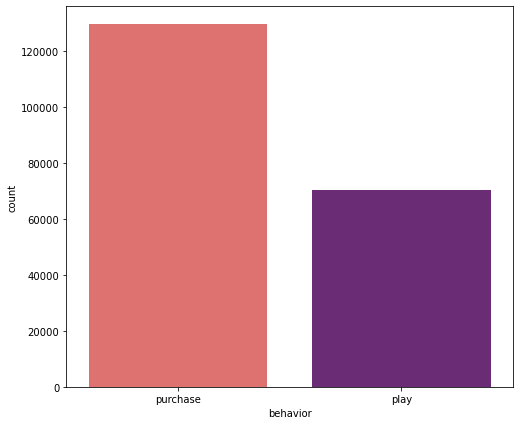

In [6]:
plt.figure(figsize=(8,7))
sns.countplot(data=df_interactions, x=df_interactions['behavior'], palette='magma_r')
plt.show()

Antes de removermos os registros de jogos comprados, vamos dar uma olhada na quantidade de cada modalidade.

Verificamos pelo gráfico que a maior parte dos registros são de jogos comprados: aproximadamente 130 mil registros são de jogos comprados e 70 mil de jogos realmente jogados. Não temos mais nenhuma informação sobre esses jogos comprados.

Com isso verificamos que, mesmo havendo uma menor quantidade de jogos jogados, ainda assim há muitos dados para serem trabalhados e geradas as análises.

In [7]:
print('Número de jogos distintos {}'.format(df_interactions['game_name'].nunique()))

Número de jogos distintos 5155


In [8]:
print('Número de jogos distintos comprados {}'.format(df_interactions[df_interactions['behavior'] == 'purchase']['game_name'].nunique()))

Número de jogos distintos comprados 5155


In [9]:
print('Número de jogos distintos jogados {}'.format(df_interactions[df_interactions['behavior'] == 'play']['game_name'].nunique()))

Número de jogos distintos jogados 3600


Pouco mais de 5 mil jogos compõe o catálogo de jogos da base. 5155 diferentes jogos foram comprados (todos os jogos da base) e 3600 foram jogados (aproximadamente 70% dos jogos).


In [10]:
play_count = len(df_interactions[df_interactions['behavior']=='play'])
purchase_count = len(df_interactions[df_interactions['behavior']=='purchase'])

print('Número de interações do tipo "Jogar":', play_count)
print('Número de interações do tipo "Comprar":', purchase_count)

Número de interações do tipo "Jogar": 70489
Número de interações do tipo "Comprar": 129511


Há aproximadamente 70000 interações de jogos jogados e 130000 interações de jogos comprados.

### Top-10 jogos mais comprados ou jogados

Em seguida, iremos listar os 10 jogos mais jogados e comprados, para observarmos a relação entre eles

In [11]:
#vamos fazer um método para retornar N jogos mais jogados ou mais comprados
#df_in - dataframe de entrada
#n - top N jogos que queremos inspecionar
#behaviour - comportamento -> jogo comprado (purchase) ou jogado (play)
def get_top_n_by_behavior(df_in, n, behavior):    
    #vamos filtar e retornara somente os campos com o nome do jogo, comportamente e id do usuário
    df_filtered = df_in.filter(['game_name','behavior', 'user_id'])
    
    #vamos filtar pelo comportamento
    df_filtered_play = df_filtered[df_filtered['behavior'] == behavior]
    
    #vamos remover a coluna de comportamento
    df_filtered_play = df_filtered_play.drop(columns=['behavior'])
    
    #vamos agrupar pelo nome do jogo para contarmos quantas interações temos por jogados
    df_grouped = df_filtered_play.groupby(['game_name']).count().rename(columns={'user_id':'total'})
    
    #vamos ordenar de forma descendente pelo total de interações de cada jogo
    df_grouped_sorted = df_grouped.sort_values('total', ascending=False)
    
    #e finalmente retornar os top N comprados ou jogados
    top_n_played = df_grouped_sorted.head(n)
    return top_n_played

### Os 10 jogos mais jogados

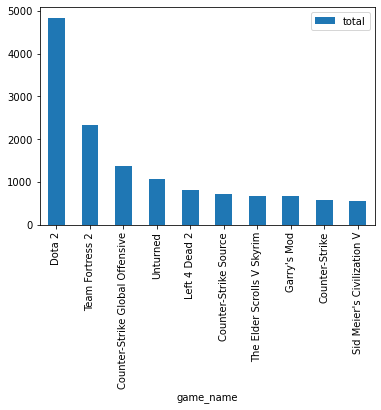

,total
game_name,
Dota 2,4841
Team Fortress 2,2323
Counter-Strike Global Offensive,1377
Unturned,1069
Left 4 Dead 2,801
Counter-Strike Source,715
The Elder Scrolls V Skyrim,677
Garry's Mod,666
Counter-Strike,568


In [12]:
top_10_played = get_top_n_by_behavior(df_interactions, 10, 'play')
top_10_played.plot.bar()
plt.show()

# visualizando em números os 10 mais jogados online
top_10_played

Pelo gráfico e tabela, podemos ver que o jogo mais jogado é o Dota 2, com quase 5 mil interações. Praticamente o dobro do segundo mais jogado, Team Fortress 2.

### Os 10 jogos mais comprados

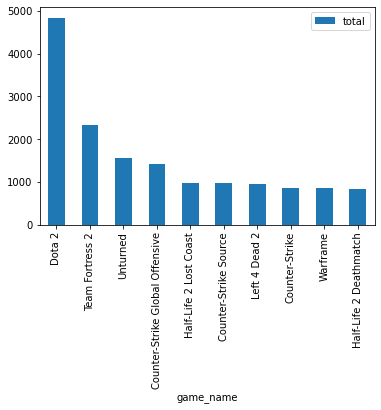

,total
game_name,
Dota 2,4841
Team Fortress 2,2323
Unturned,1563
Counter-Strike Global Offensive,1412
Half-Life 2 Lost Coast,981
Counter-Strike Source,978
Left 4 Dead 2,951
Counter-Strike,856
Warframe,847


In [13]:
top_10_purchased = get_top_n_by_behavior(df_interactions, 10, 'purchase')
top_10_purchased.plot.bar()
plt.show()

#os 10 jogos mais comprados em número
top_10_purchased

### Comparação dos 10 jogos mais comprados e jogados

Unindo das tabelas de jogos mais comprados e jogados, conseguimos visualizá-los e compará-los de maneira mais fácil.

In [14]:
df_10_most_playd_purchased = pd.merge(top_10_purchased, top_10_played, on=['game_name'], how = 'outer')
df_10_most_playd_purchased.columns = ['# purchased', '# played']
df_10_most_playd_purchased.replace(np.nan, 0, inplace=True)
df_10_most_playd_purchased

,# purchased,# played
game_name,,
Dota 2,4841.0,4841.0
Team Fortress 2,2323.0,2323.0
Unturned,1563.0,1069.0
Counter-Strike Global Offensive,1412.0,1377.0
Half-Life 2 Lost Coast,981.0,0.0
Counter-Strike Source,978.0,715.0
Left 4 Dead 2,951.0,801.0
Counter-Strike,856.0,568.0
Warframe,847.0,0.0


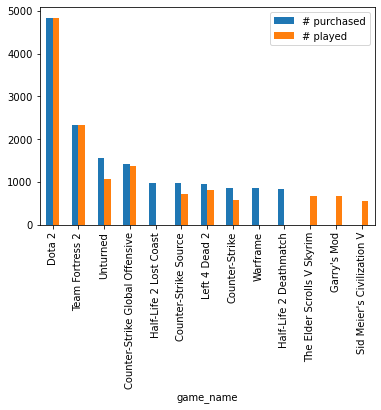

In [15]:
df_10_most_playd_purchased.plot.bar()
plt.show()

É interessante perceber que os 2 jogos mais jogados são também os 2 jogos mais comprados (download gratuíto pois são jogos com custo R$0,00), Dota 2 e Team Fortress 2. 

Mais adiante, carregaremos uma base de dados com informações do conteúdo dos jogos. Muitos jogos são gratuídos mas vendem ítems / acessários para os jogadores. Essa é uma estratégia para atrair os jogares e ainda monetizar o jogo de forma indireta.

A própria Steam recomenda Team Fortress 2 pra quem está vendo Dota 2 e vice-e-versa.

<img src="figs/doda_2_fortress.png" alt="Steam também recomenda Team Fortress 2 pra quem navega por Dota 2" width="400" align="center"/>

A seguir, são informadas as descrições de ambos os jogos, como disponibilizado na Steam:

### DOTA 2 (Ação / Estratégia - de graça pra jogar)

_O jogo mais jogado no Steam._

_Todos os dias, milhões de jogadores em todo o mundo entram na batalha como um dos mais de cem heróis Dota. E não importa se é a décima hora de jogo ou milésima, sempre há algo novo para descobrir. Com atualizações regulares que garantem uma evolução constante da jogabilidade, recursos e heróis, Dota 2 realmente ganhou vida própria._

_Um campo de batalha. Possibilidades infinitas.
Quando se trata de diversidade de heróis, habilidades e itens poderosos, Dota possui uma variedade infinita - não há dois jogos iguais. Qualquer herói pode desempenhar várias funções e há uma abundância de itens para ajudar a atender às necessidades de cada jogo. Dota não oferece limitações sobre como jogar, ele permite que você expresse seu próprio estilo._

_Todos os heróis são gratuitos.
O equilíbrio competitivo é a joia da coroa de Dota e, para garantir que todos estejam jogando em um campo uniforme, o conteúdo central do jogo - como o vasto grupo de heróis - está disponível para todos os jogadores. Os fãs podem coletar cosméticos para heróis e complementos divertidos para o mundo em que habitam, mas tudo que você precisa para jogar já está incluído antes de entrar na sua primeira partida._

_Traga seus amigos e festeje.
Dota é profundo e está em constante evolução, mas nunca é tarde para entrar.
Aprenda a jogar co-op vs. bots. Afie suas habilidades no modo de demonstração do herói. Salte para o sistema de matchmaking baseado em comportamento e habilidade que garante que você
ser combinado com os jogadores certos em cada jogo._


### Team Fortress 2 (Ação - de graça pra jogar)

_O jogo grátis mais bem avaliado de todos os tempos!
Um dos **jogos de ação** online mais populares de todos os tempos, Team Fortress 2 oferece atualizações gratuitas constantes - novos modos de jogo, mapas, equipamentos e, o mais importante, chapéus. Nove classes distintas fornecem uma ampla gama de habilidades táticas e personalidades e se prestam a uma variedade de habilidades do jogador._

_Novo no TF? Não se preocupe!
Não importa qual seja o seu estilo e experiência, nós temos um personagem para você. O treinamento detalhado e os modos de prática offline irão ajudá-lo a aprimorar suas habilidades antes de pular para um dos muitos modos de jogo do TF2, incluindo Captura da Bandeira, Ponto de Controle, Carga Útil, Arena, Rei da Colina e muito mais._

_Faça seu próprio personagem!
Existem centenas de armas, chapéus e muito mais para coletar, fabricar, comprar e trocar. Ajuste sua aula favorita de acordo com seu estilo de jogo e gosto pessoal. Você não precisa pagar para ganhar - virtualmente todos os itens da Mann Co. Store também podem ser encontrados no jogo._


---
# Conjunto de dados do conteúdo dos jogos

Outra fonte de dados que temos contém um conjunto de jogos com informações de conteúdo, como seu gênero, data de lançamento, entre outras. Este dataset pode ser baixado no link: <a href="https://www.kaggle.com/trolukovich/steam-games-complete-dataset?select=steam_games.csv">steam_games.csv</a>


In [16]:
df_games = pd.read_csv('steam_games.csv')
df_games.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


### Campos interessantes de serem usados em um sistema de recomendação baseado em conteúdo:

`url` - url para acesso ao jogo; dela, podemos extrar o ID do jogo e usá-lo ao invés do nome do jogo (campo que temos disponível no steam-200k);

`name` - nome do jogo; teremos que usar esse campo como chave para combinar as informações dos dois conjuntos de dados;

`recent_reviews` - análises recentes; podemos extrair desse campo a informação das avaliações mais recentes do jogo, como "very positive", "mixed", etc e sua porcentagem num total de X _reviews_;

`all_reviews` - todas as análises; assim como o campo `recent_reviews`, podemos extrair as avaliações. Contudo, ao contrário do atnerior, esse campo contém todas as revisões de um dado jogo;

`popular_tags` - rótulos do jogo; podemos extrair algumas marcações de classificação para podermos relacionar os jogos;

`game_details` - detalhes d jogo; podemos extrair detalhes dos jogos para relacioná-los de acordo com suas características (multiplayer, single-player, cooperativo, etc);

`genre` - gênero; contém a classificação de gênero do jogo. Podemos usar esse campo como base para recomendação de similaridade baseada nesta informação;

`game_description` - descrição do jogo; basicamente o mesmo do `game_details`, descrevendo o jogo de frma textual;

`mature_content` - existência de conteúdo adulto; pode ser interessante observar o comportamento de jogadores que gostam de jogos cujo conteúdo seja dedicado a pessoas maiores de idade, e usar essa informação pra sugerir jogos parecidos.

`original_price` - preço do jogo; pode ser utilizado como informação para recomendarmos jogos na faixa de preço procurada pelo usuário. Tem muitos jogadores, principalmente jovens / crianças que jogam mais jogos gratuitos devido ao seu acesso fácil, sem a necessidade de um adulto disponibilizar um cartão de crédito na conta por exemplo.

### Análise do Dataset

O objetivo desta seção é explorar os dados do dataset *steam_games.csv* para entendermos melhor seu conteúdo 

In [17]:
#vamos verificar mas informações dos jogos, como por exemplo quantidade de linhas (jogos),
#valores nulos, memória consumida
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

São 1274 linhas, ou seja temos 1274 dados categóricos de jogos (descrição, recomendação, gênero, etc).

Nenhuma linha possui dado nulo, somente NaN. que dependendo do que formos fazer precisaremos aplicar uma lógica de remoção dos NaN.

O conjuto de todos os dados de jogos ocupam somente 209 Kb

In [18]:
#vamos renomear a coluna name para game_name para usarmos como chave e mantermos a mesma nomenclatura do 
#outro conjunto de dados. 
df_games = df_games.rename(columns={'name': 'game_name'})
df_games.head()

,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


### Vamos verificar se os jogos Dota 2 e Team Fortress 2 estão nessa lista

In [19]:
display(df_games[df_games['game_name']=='Dota 2'])

display(df_games[df_games['game_name']=='Team Fortress 2'])

,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
419,https://store.steampowered.com/app/570/Dota_2/,app,Dota 2,"Every day, millions of players worldwide enter...","Mostly Positive,(7,804),- 73% of the 7,804 use...","Very Positive,(1,015,621),- 85% of the 1,015,6...","Jul 9, 2013",Valve,"Valve,Valve","Free to Play,MOBA,Multiplayer,Strategy,e-sport...","Multi-player,Co-op,Steam Trading Cards,Steam W...","English,Bulgarian,Czech,Danish,Dutch,Finnish,F...",NaN,"Action,Free to Play,Strategy",About This Game The most-played game on Stea...,NaN,NaN,NaN,Free to Play,$65.70


,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
386,https://store.steampowered.com/app/440/Team_Fo...,app,Team Fortress 2,Nine distinct classes provide a broad range of...,"Very Positive,(3,526),- 91% of the 3,526 user ...","Very Positive,(553,458),- 93% of the 553,458 u...","Oct 10, 2007",Valve,"Valve,Valve","Free to Play,Multiplayer,FPS,Shooter,Action,Cl...","Multi-player,Cross-Platform Multiplayer,Steam ...","English,Danish,Dutch,Finnish,French,German,Ita...",520.0,"Action,Free to Play","About This Game ""The most fun you can have o...",Mature Content Description The developers de...,"Minimum:,OS:,Windows® 7 (32/64-bit)/Vista/XP,P...","Recommended:,OS:,Windows® 7 (32/64-bit),Proces...",Free to Play,$65.70


### Ambos os jogos foram encontrados na base, vamos verificar os detalhes



Ambos tem uma review muito positiva, 85% de 1015621 avaliações para Dota 2 e 93% de 553458 avaliações para Team Fortress 2.

Ambos jogos são feitos pela Valve, gratuitos para jogar, multiplayer suportados em vários idiomas. O Gênero de ambos é ação.

Podemos inferir que os jogos mais buscados são jogos gratuitos, de ação e multiplayer. 



### Análise da distribuição por gênero e preço do jogo

Primeiro vamos tratar os `NaNs` (valores nulos) nas colunas `genre` (gênero) e `original_price` (preço original) para que possamos trabalhar com os dados e gerar representações gráficas.

In [20]:
#NaNs na coluna gênero
print('Quantidade de NaNs na coluna gênero: {}'.format(df_games['genre'].isna().sum()))

Quantidade de NaNs na coluna gênero: 438


In [21]:
#NaNs na coluna preço oririnal
print('Quantidade de NaNs na coluna preço: {}'.format(df_games['original_price'].isna().sum()))

Quantidade de NaNs na coluna preço: 5311


### Estratégia para preencher os NaNs de gênero e preço

para a coluna gênero vamos substituir por 'Not Classified' e para a coluna preço vamos remover as linhas para não interferir no gráfico.

In [22]:
df_games['genre'] = df_games['genre'].fillna('Not Classified')
print('Quantidade de NaNs na coluna gênero {}'.format(df_games['genre'].isna().sum()))

Quantidade de NaNs na coluna gênero 0


In [23]:
df_games_nonan = df_games.dropna(subset=['original_price'])
print('Quantidade de NaNs na coluna gênero {}'.format(df_games_nonan['original_price'].isna().sum()))

Quantidade de NaNs na coluna gênero 0


### Verificando a quantidade dos jogos por determinadas características

#### Gênero

,total
genre,
Action,2201
"Action,Indie",1869
"Casual,Indie",1577
"Action,Adventure,Indie",1335
Simulation,1320
"Adventure,Indie",1251
"Casual,Simulation",1168
Strategy,949
"Action,Casual,Indie",927


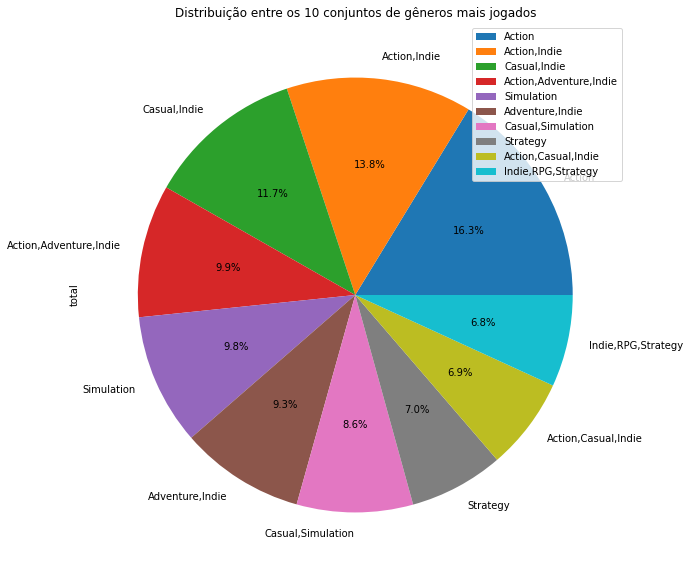

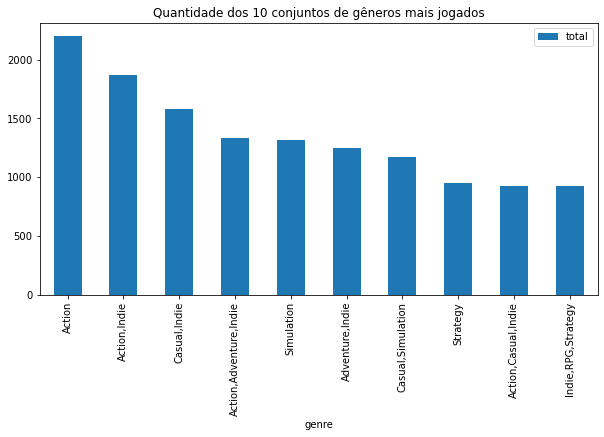

In [37]:
df_grouped_genre = df_games_nonan.filter(['game_name', 'genre']).groupby(['genre']).count().rename(columns={'game_name': 'total'})

# Tabela
df_grouped_genre_sorted = df_grouped_genre.sort_values('total', ascending=False)
display(df_grouped_genre_sorted.head(10))

# Grafico de pizza
df_grouped_genre_sorted.head(10).plot.pie(y='total', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Distribuição entre os 10 conjuntos de gêneros mais presentes na base da Steam')
plt.show()

# Grafico de colunas
df_grouped_genre_sorted.head(10).plot.bar(figsize=(10, 5))
plt.title('Quantidade dos 10 conjuntos de gêneros mais presentes na base da Steam')
plt.show()

#### Pelos gráficos, temos que o gênero "ação" está presente em 40\% dos 10 conjuntos de gêneros mais presentes na base

In [29]:
total_games = len(df_games_nonan)
print('Quantidade de jogos: {}'.format(total_games))

Quantidade de jogos: 35522


In [30]:
total_action_games = len(df_games_nonan[df_games_nonan['genre'].str.contains('Action')])
print('Quantidade de jogos de ação: {}'.format(total_action_games))

Quantidade de jogos de ação: 14163


In [31]:
print('Porcentagem de jogos de ação em relação a toda base: {:.2f}%'.format((total_action_games / total_games)*100))

Porcentagem de jogos de ação: 39.87%


#### Preço

,total
original_price,
$4.99,4123
$9.99,3903
$0.99,3569
$2.99,3371
$1.99,2764
$19.99,1867
$14.99,1755
$3.99,1753
Free,1326


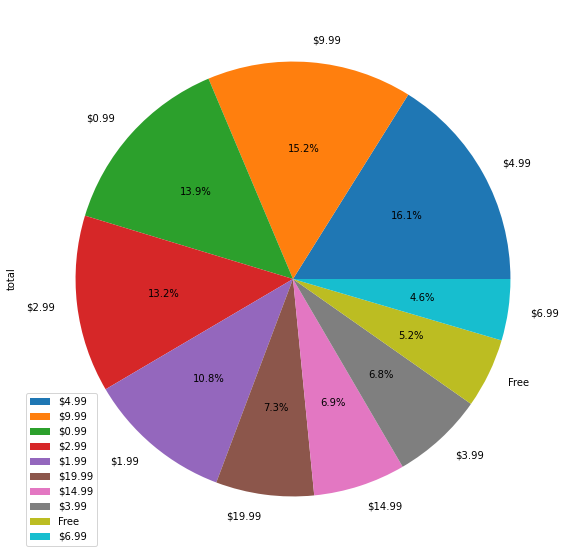

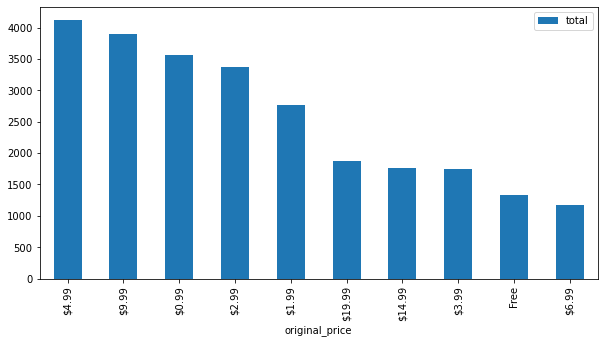

In [32]:
df_grouped_price = df_games_nonan.filter(['game_name', 'original_price']).groupby(['original_price']).count().rename(columns={'game_name': 'total'})

df_grouped_price_sorted = df_grouped_price.sort_values('total', ascending=False)
display(df_grouped_price_sorted.head(10))

df_grouped_price_sorted.head(10).plot.pie(y='total', figsize=(10, 10), autopct='%1.1f%%')
plt.title('Distribuição entre as 10 faixas de preço mais presentes na base da Steam')
plt.show()

df_grouped_price_sorted.head(10).plot.bar(figsize=(10, 5))
plt.title('Quantidade das 10 faixas de preço mais presentes na base da Steam')
plt.show()

#### Pelos gráficos, temos que o valor mais comum entre os jogos da Steam é \$4.99

In [47]:
total_4_99_games = len(df_games_nonan[df_games_nonan['original_price'] == '$4.99'])
print('Quantidade de jogos que custam $4.99: {}'.format(total_4_99_games))

Quantidade de jogos que custam $4.99: 4123


In [49]:
print('Porcentagem de jogos que custam $4.99: {:.2f}%'.format((total_4_99_games / total_games)*100))

Porcentagem de jogos que custam $4.99: 11.61%


Com essa análise, pudemos verificar que os jogos mais presentes na base são do tipo "Ação" e custam \$4.99. 

Como vimos anteriormente, os jogos mais jogados também são de ação, mas são gratuitos, o que é um contraponto interessante. Mesmo não sendo maioria na base (9º na ordem de preço, como mostrado na tabela acima), jogos gratuitos possuem um grande apelo em relação aos usuários.

---
# Pré processamento

## Unificando as bases de interações com a de dados dos jogos

### Filtrando as interações tendo como base a lista de jogos e seus atributos

É interessante unificarmos as duas bases, removendo as interações de jogos que não temos conhecimento de conteúdo, para mantermos uma lista única concisa de metadados x interações. Embora isso reduzirá a quantidade disponível de dados, ainda teremos uma quantidade considerável de dados para fazer as análises e recomendações.

Como vimos na análise das interações, somente 35% das interações dos jogos são do tipo "jogar". Ainda assim, como temos um volume considerável de interações (70489), podemos considerar somente os jogos jogados sem grande perda de dados. A vantagem desta escolha é que podemos usar a propriedade de horas jogadas para gerar uma nota pra cada jogo. Essa nota servirá como uma **taxa de confiança** para alimentarmos aos nossos algoritmos de recomendação e possivelmente melhorá-los.

In [38]:
df_only_played = df_interactions[df_interactions['hours_played'] > 1]

#### Vamos filtrar os jogos para que sejam os mesmos encontrados na lista de usuário x game e vice versa

In [39]:
unique_games_list = list(df_only_played['game_name'].unique())
df_games = df_games[df_games['game_name'].isin(unique_games_list)]
df_games_list = list(df_games['game_name'].unique())
df_interactions = df_only_played[df_only_played['game_name'].isin(df_games_list)]

In [40]:
df_games.head(5)

,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
12,https://store.steampowered.com/app/323370/TERA/,app,TERA,"From En Masse Entertainment, TERA is at the fo...","Mixed,(76),- 63% of the 76 user reviews in the...","Mostly Positive,(14,184),- 78% of the 14,184 u...","May 5, 2015","Bluehole, Inc.","En Masse Entertainment,En Masse Entertainment","Free to Play,MMORPG,Massively Multiplayer,RPG,...","Multi-player,MMO,Co-op,Steam Trading Cards,Par...",English,NaN,"Action,Adventure,Free to Play,Massively Multip...",About This Game TERA is at the forefront of ...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7, 32-bit,Processor:,Inte...","Recommended:,OS:,Windows 7, 8, 8.1, 10, 64-bit...",Free to Play,NaN
14,https://store.steampowered.com/app/253250/Ston...,app,Stonehearth,"Pioneer a living world full of warmth, heroism...","Mixed,(66),- 40% of the 66 user reviews in the...","Mostly Positive,(5,484),- 75% of the 5,484 use...","Jul 25, 2018",Radiant Entertainment,"(none),(none)","City Builder,Building,Sandbox,Strategy,Surviva...","Single-player,Multi-player,Online Multi-Player...",English,NaN,"Indie,Simulation,Strategy","About This Game In Stonehearth, you pioneer a...",NaN,"Minimum:,OS:,Windows 7/8/8.1/10 (32-bit or 64-...","Recommended:,OS:,Windows 10,Processor:,Intel o...",$19.99,NaN
24,https://store.steampowered.com/app/12210/Grand...,app,Grand Theft Auto IV,What does the American dream mean today? For N...,"Mixed,(303),- 66% of the 303 user reviews in t...","Mixed,(43,799),- 63% of the 43,799 user review...","Dec 2, 2008","Rockstar North,Rockstar Toronto","Rockstar Games,Rockstar Games","Open World,Action,Bowling,Multiplayer,Third Pe...","Single-player,Multi-player,Partial Controller ...","English,French,Italian,German,Spanish - Spain",NaN,"Action,Adventure",About This Game PLEASE NOTE: Microsoft no l...,NaN,NaN,NaN,$19.99,NaN


In [41]:
print('Quantidade de jogos após unificação com a base de dados descritivos: {}'.format(df_games['game_name'].size))

Quantidade de jogos após unificação com a base de dados descritivos: 1274


In [42]:
print('Quantidade de interações após unificação com a base de dados descritivos: {}'.format(len(df_interactions)))

Quantidade de interações após unificação com a base de dados descritivos: 27341


#### Reduzimos a base de interações para pouco mais de 10% do total anteior. Temos agora 27341 interações

### Verificando jogos com nomes duplicados (variações de jogos)

In [43]:
df_games.groupby('game_name', as_index=False).size().sort_values('size', ascending=False)

,game_name,size
1077,The Deer,2
1211,Warhammer Quest,2
301,Dodge,2
811,RUSH,2
406,Flashback,2
...,...,...
423,Frozen Synapse Prime,1
422,Frozen Synapse,1
421,Front Mission Evolved,1
420,From Dust,1


#### Como podemos verificar, há jogos com nomes duplicados, vamos removê-los. 

Exemplo de nome duplicado

In [44]:
df_games[df_games['game_name'] == 'The Deer']

,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
20112,https://store.steampowered.com/app/400240/The_...,app,The Deer,"""The Deer"" is an educational inter­ac­tive exp...",NaN,"Mostly Positive,(317),- 70% of the 317 user re...","Dec 2, 2015","Fabio Ferrara,Giulia Airoldi","Chubby Pixel,Chubby Pixel","Indie,Adventure,Education,Family Friendly,Shor...","Single-player,Full controller support,Steam Tr...",English,NaN,"Adventure,Indie","About This Game ""The Deer"" is an educational...",NaN,"Minimum:,OS:,Windows XP SP3,Processor:,Intel D...","Recommended:,OS:,Windows 7 or higher,Processor...",$0.99,$11.94
39625,https://store.steampowered.com/app/818390/The_...,app,The Deer,Professional Bigfoot hunters Anthony Grant and...,NaN,NaN,Fall 2019,Dodo Digital,"Dodo Digital,Dodo Digital","Gore,Adventure,Violent,Indie,Horror,Hunting,Fi...","Single-player,Steam is learning about this gam...",English,NaN,"Adventure,Indie",About This Game Professional Bigfoot hunters ...,Mature Content Description The developers de...,NaN,NaN,NaN,NaN


In [45]:
print('Quantidade de jogos: {}'.format(df_games['game_name'].unique().size))

Quantidade de jogos: 1268


Alguns jogos estão duplicados por serem variantes do mesmo jogo, o que podemos verificar pelo ID. Como não temos o ID do jogo na lista de usuário x jogo, mas sim o nome do jogo, vamos ter que eliminar a duplicidade. 

Será selecionado então o primeiro jogo da lista para mantermos na base.


In [46]:
df_games.drop_duplicates(subset=['game_name'], keep='first', inplace=True)
df_games.reset_index(inplace=True)
df_games['game_index'] = df_games.index
df_games[df_games['game_name'] == 'The Deer']

,index,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,...,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,game_index
993,20112,https://store.steampowered.com/app/400240/The_...,app,The Deer,"""The Deer"" is an educational inter­ac­tive exp...",NaN,"Mostly Positive,(317),- 70% of the 317 user re...","Dec 2, 2015","Fabio Ferrara,Giulia Airoldi","Chubby Pixel,Chubby Pixel",...,English,NaN,"Adventure,Indie","About This Game ""The Deer"" is an educational...",NaN,"Minimum:,OS:,Windows XP SP3,Processor:,Intel D...","Recommended:,OS:,Windows 7 or higher,Processor...",$0.99,$11.94,993


In [47]:
print('Quantidade de jogos: {}'.format(df_games['game_name'].unique().size))

Quantidade de jogos: 1268


In [48]:
#agora temos a mesma quantidade de linhas nas 2 tabelas
df_games[df_games['game_name'] == 'Skyborn']

,index,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,...,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,game_index
492,3425,https://store.steampowered.com/app/278460/Skyb...,app,Skyborn,Life under the rule of the winged Skyborn race...,NaN,"Very Positive,(418),- 88% of the 418 user revi...","Feb 21, 2014",Dancing Dragon Games,"Degica,Degica",...,"English,Japanese",24.0,"Casual,RPG",About This Game Life under the rule of the wi...,NaN,NaN,NaN,$14.99,$33.96,492


### Adicionando um ID para o jogo na tabela de interações (até então o relacionamento é feito pelo nome do jogo)

#### Vamos adicionar o índice do jogo na tabela de interações para facilitar a busca quando for necessário

In [49]:
#a tabela de user x games não tem o id do jogo, então vamos adicionar pra facilitar a localização do jogo
df_game_index  = df_games.filter(['game_index', 'game_name'])
df_game_index

key_col = ['game_name']
df_interactions_with_game_index = df_interactions.join(df_game_index.set_index(key_col), on=key_col).rename(columns={'game_index': 'game_index'})
display(df_interactions_with_game_index)

,user_id,game_name,behavior,hours_played,game_index
3,151603712,Fallout 4,play,87.0,66
9,151603712,Left 4 Dead 2,play,8.9,40
11,151603712,HuniePop,play,8.5,135
13,151603712,Path of Exile,play,8.1,71
15,151603712,Poly Bridge,play,7.5,179
...,...,...,...,...,...
199987,128470551,Rogue Legacy,play,2.6,146
199989,128470551,Mortal Kombat Komplete Edition,play,2.5,168
199993,128470551,Magic Duels,play,2.2,260
199995,128470551,Titan Souls,play,1.5,863


Agora podemos recuprar informações sobre o jogo de forma mais prática

In [50]:
df_games[df_games['game_index']==66]

,index,url,types,game_name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,...,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,game_index
66,405,https://store.steampowered.com/app/377160/Fall...,app,Fallout 4,"Bethesda Game Studios, the award-winning creat...","Mostly Positive,(706),- 70% of the 706 user re...","Mostly Positive,(90,387),- 70% of the 90,387 u...","Nov 9, 2015",Bethesda Game Studios,"Bethesda Softworks,Bethesda Softworks",...,"English,French,Italian,German,Spanish - Spain,...",84.0,RPG,"About This Game Bethesda Game Studios, the aw...",NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,$14.99,66


## Taxa de Confiança

Para enriquecer os resultados obtidos pelos algoritmos, iremos calcular uma **taxa de confiança**, que representará o quanto um usuário gosta de determinado jogo. Para isso, será usado como base o número de horas gastas pelo usuário nos jogos de forma geral, em comparação com um determinado jogo.

Temos como suposição que o grau de satisfação de um usuário com um jogo pode ser medido de acordo com o número de horas jogadas neste jogo, de forma que quanto mais tempo um usuário despenda em um jogo, mas seja de seu agrado. Entretanto, como usuários possuem comportamentos diferentes, se faz interessante analisar esta quantidade de horas jogadas em comparação com quantas horas o usuário em questão normalmente dedica a jogos eletrônicos. Também é interessante verificar as horas jogadas em comparação com o resto da comunidade, pois muitas vezes jogos específicos demandam menos tempo de jogo do que outros.

Vamos calcular três taxas de confiança:
* **Taxa de Confiança Local (TCL)**: tem como base a mediana de horas jogadas pelo jogador em todos os jogos;
* **Taxa de Confiança Global (TCG)**: tem como base a mediana de horas gasta por todos os jogadores num determinado jogo;
* **Taxa de Confiança Média (TCM)**: calculada através da média aritimética entre as duas taxas acima.

### Taxa de Confiança Local (TCL)

$$\text{TCL}(u,j) = 100 \times \frac{H_{u,j}}{H_u}$$

Onde $H_{u,j}$ é a quantidade de horas que o jogador $u$ passou no jogo $j$, e $H_u$ é a quantidade total de horas jogadas pelo jogador $u$.

**Exemplo**: se Tom jogou 4,5 horas de Dota 2, 0,5 hora de Team Fortress 2, 5 horas de Mortal Kombat e 10 horas de The Witcher

$$\text{TCL}(\text{Tom},\text{Dota 2}) = 100 \times \frac{4,5}{(4,5+0,5+5+10)} = 100 \times \frac{4,5}{20} = 22,5$$

In [51]:
df_filtered = df_interactions_with_game_index.filter(['user_id','hours_played'])
df_grouped = df_filtered.groupby(['user_id'], as_index=False).median()
df_grouped = df_grouped.rename(columns={'hours_played':'median_local'})
played_games_median_time_per_user = df_grouped.sort_values('median_local', ascending=False)
played_games_median_time_per_user

,user_id,median_local
3429,153382649,9640.0
2676,130882834,7765.0
1804,101414179,5982.0
1666,95758079,5866.0
2260,117106617,5229.0
...,...,...
2304,118859786,1.1
1761,99500959,1.1
3051,142284353,1.1
101,9134079,1.1


In [53]:
df_with_median_played_time_per_user = pd.merge(df_interactions_with_game_index, played_games_median_time_per_user, on=["user_id"], how='right')

# Calcula o total de horas por jogador
df_with_median_played_time_per_user = pd.merge(
    df_with_median_played_time_per_user,
    df_with_median_played_time_per_user.groupby('user_id')['hours_played'].sum().to_frame('sum_local'), 
    how='left', left_on='user_id', right_index=True
)
# Calcula a proporcao do tempo jogado
df_with_median_played_time_per_user['TCL_ADJ'] = df_with_median_played_time_per_user['hours_played'] * 100 / df_with_median_played_time_per_user['sum_local']

df_with_median_played_time_per_user


,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ
0,153382649,Team Fortress 2,play,9640.0,63,9640.0,9640.0,100.0
1,130882834,Dota 2,play,7765.0,72,7765.0,7765.0,100.0
2,101414179,Dota 2,play,5982.0,72,5982.0,5982.0,100.0
3,95758079,Dota 2,play,5866.0,72,5866.0,5866.0,100.0
4,117106617,Dota 2,play,5229.0,72,5229.0,5229.0,100.0
...,...,...,...,...,...,...,...,...
27336,118859786,Team Fortress 2,play,1.1,63,1.1,1.1,100.0
27337,99500959,Team Fortress 2,play,1.1,63,1.1,1.1,100.0
27338,142284353,Dota 2,play,1.1,72,1.1,1.1,100.0
27339,9134079,Half-Life 2,play,1.1,103,1.1,1.1,100.0


### Taxa de Confiança Global (TCG)

$$R(u,j) = \frac{H_{u,j}}{M(j)}$$

$$\text{TCG}(u,j) = \begin{cases} R(u,j), & \text{se } H_{u,j} \geqslant M(j) \\ -\frac{1}{R(u,j)}, & \text{se } H_{u,j} < M(j) \end{cases}$$

Onde $H_{u,j}$ é a quantidade de horas que o jogador $u$ passou no jogo $j$ e $M(j)$ é a mediana entre todas as horas jogadas por cada jogador para o jogo $j$.

**Exemplo 1**: se Tom jogou 16 horas de Dota 2 e a mediana de horas jogadas entre todos os jogadores para Dota 2 for 8...

$$R(\text{Tom},\text{Dota 2}) = \frac{H_{u,j}}{M(j)} = \frac{16}{8} = 2$$

<div align="center">Como $H_{u,j} \geqslant M(j)$...</div>

$$\text{TCG}(\text{Tom},\text{Dota 2}) = R(\text{Tom},\text{Dota 2}) = 2$$


**Exemplo 2**: se Ana jogou 6 horas de Dota 2 e a mediana de horas jogadas entre todos os jogadores para Dota 2 for 8...

$$R(\text{Ana},\text{Dota 2}) = \frac{H_{u,j}}{M(j)} = \frac{6}{8} = 0,75$$

<div align="center">Como $H_{u,j} < M(j)$...</div>

$$\text{TCG}(\text{Ana},\text{Dota 2}) = -\frac{1}{R(\text{Ana},\text{Dota 2})} = -\frac{1}{0,75} = -1,33$$

In [54]:
df_filtered = df_interactions_with_game_index.filter(['game_index','hours_played'])
df_grouped = df_filtered.groupby(['game_index'], as_index=False).median()
df_grouped = df_grouped.rename(columns={'hours_played':'median_global'})
played_games_median_time_per_game = df_grouped.sort_values('median_global', ascending=False)
played_games_median_time_per_game

,game_index,median_global
455,455,1295.00
732,732,444.85
541,541,331.00
1248,1248,300.00
41,41,266.00
...,...,...
727,727,1.10
662,662,1.10
1211,1211,1.10
1245,1245,1.10


vamos colocar a mediana na tabela de interações para calcularmos a taxa de confiança global


In [55]:
df_with_median_played_time = pd.merge(df_with_median_played_time_per_user, played_games_median_time_per_game, on=["game_index"], how='right')
df_with_median_played_time['TCG']=df_with_median_played_time['hours_played']/df_with_median_played_time['median_global']

# Captura onde as horas jogadas sao menores que a mediana
lt_med = df_with_median_played_time['TCG']<1

# Normaliza entre 1 e 100
def scale_1_100(x):
    return minmax_scale(x.astype(float), feature_range=(1,100)).round(2)

# Calcula o TCG
df_with_median_played_time.loc[lt_med, 'TCG'] = -1/df_with_median_played_time[lt_med]['TCG']
df_with_median_played_time['TCG_ADJ'] = df_with_median_played_time['TCG'].transform(lambda x: scale_1_100(x))
df_with_median_played_time

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ
0,213854339,Eastside Hockey Manager,play,1295.0,455,1295.00,1295.0,100.000000,1295.00,1.000000,24.64
1,300248088,Sigils of Elohim,play,888.0,732,887.50,1775.0,50.028169,444.85,1.996178,24.73
2,99264709,Sigils of Elohim,play,1.7,732,10.90,1573.1,0.108067,444.85,-261.676471,1.00
3,33651880,Freaking Meatbags,play,331.0,541,14.60,3425.3,9.663387,331.00,1.000000,24.64
4,127850470,Kingdoms CCG,play,300.0,1248,70.00,1260.4,23.801968,300.00,1.000000,24.64
...,...,...,...,...,...,...,...,...,...,...,...
27336,131463112,Hacker Evolution Duality,play,1.1,1211,4.50,263.4,0.417616,1.10,1.000000,24.64
27337,86469479,Hacker Evolution Duality,play,1.1,1211,4.30,535.0,0.205607,1.10,1.000000,24.64
27338,155919035,Hacker Evolution Duality,play,1.1,1211,3.70,764.1,0.143960,1.10,1.000000,24.64
27339,254692357,Autobahn Police Simulator,play,1.1,1245,4.15,8.3,13.253012,1.10,1.000000,24.64


### Taxa de confiança baseada nas medianas local e global (TCM)  - Taxa de Confiança Média

A taxa de confiança média é baseada na média aritimética entre a taxa de confiança local e a taxa de confiança global

$$ {TCM} = \frac{(TCL+TCG)}2 $$

TCL $\rightarrow$ Taxa de Confiança Local

TCG $\rightarrow$ Taxa de Confiança Global

In [56]:
df_local = df_with_median_played_time['TCL_ADJ']
df_global = df_with_median_played_time['TCG_ADJ']

df_with_median_played_time['TCM_ADJ'] = (df_local + df_global) / 2

df_interactions = df_with_median_played_time.copy()
df_interactions.head(20)

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
0,213854339,Eastside Hockey Manager,play,1295.0,455,1295.00,1295.0,100.000000,1295.00,1.000000,24.64,62.320000
1,300248088,Sigils of Elohim,play,888.0,732,887.50,1775.0,50.028169,444.85,1.996178,24.73,37.379085
2,99264709,Sigils of Elohim,play,1.7,732,10.90,1573.1,0.108067,444.85,-261.676471,1.00,0.554033
3,33651880,Freaking Meatbags,play,331.0,541,14.60,3425.3,9.663387,331.00,1.000000,24.64,17.151694
4,127850470,Kingdoms CCG,play,300.0,1248,70.00,1260.4,23.801968,300.00,1.000000,24.64,24.220984
5,105384518,Kenshi,play,266.0,41,8.30,1367.7,19.448710,266.00,1.000000,24.64,22.044355
6,74772820,Avernum 4,play,228.0,914,16.40,670.5,34.004474,228.00,1.000000,24.64,29.322237
7,165240612,Cultures - Northland,play,194.0,528,194.00,605.3,32.050223,194.00,1.000000,24.64,28.345112
8,155119411,Fieldrunners 2,play,367.0,796,367.00,367.0,100.000000,186.65,1.966247,24.73,62.365000
9,30519870,Fieldrunners 2,play,6.3,796,3.80,2368.3,0.266014,186.65,-29.626984,21.89,11.078007


#### Isso encerra os tratamentos que vamos fazer para obtermos uma base para o nosso sistema de recomendação

# Separar a base de dados em treino, validação e teste

Vamos criar 3 bases para alimentar os algoritmos de recomendação:

Base de treino - 80% dos dados, os modelos serão treinados com essa base

Base de validação - 10%, as validações serão feitas em cima desse base

Base de teste - 10%, e por final uma base para testarmos nossos algoritmos

In [57]:
def split_dataset(interactions, train_size):
    
    interactions_train = pd.DataFrame([], columns=interactions.columns)
    interactions_validation = pd.DataFrame([], columns=interactions.columns)
    interactions_test = pd.DataFrame([], columns=interactions.columns)
        
    test_size = 1-train_size
    
    interactions_train, interactions_remaining = train_test_split(
        interactions,
        train_size=train_size,
        test_size=test_size,
        shuffle=True,
        random_state=41
    )
    
    interactions_validation, interactions_test = train_test_split(
        interactions_remaining,
        train_size=test_size/2,
        test_size=test_size/2,
        shuffle=True,
        random_state=41
    )
    
    
    return interactions_train, interactions_validation, interactions_test

In [58]:
#separando as interações em treino, validação e teste
interactions_train, interactions_validation, interactions_test = split_dataset(df_interactions, train_size=0.8)

#### Treino

In [59]:
interactions_train

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
6190,166689541,Dota 2,play,347.0,72,347.00,347.0,100.000000,14.35,24.181185,26.73,63.365000
23366,23672423,Alien Swarm,play,4.9,874,4.90,97.8,5.010225,4.20,1.166667,24.66,14.835112
23390,63454504,Alien Swarm,play,3.0,874,3.00,3.0,100.000000,4.20,-1.400000,24.43,62.215000
6522,171509285,Dota 2,play,110.0,72,110.00,110.0,100.000000,14.35,7.665505,25.24,62.620000
176,64973908,Grand Theft Auto V,play,95.0,68,25.00,1358.1,6.995067,49.00,1.938776,24.73,15.862533
...,...,...,...,...,...,...,...,...,...,...,...,...
8513,210975085,Dota 2,play,3.8,72,3.80,3.8,100.000000,14.35,-3.776316,24.21,62.105000
21584,236042442,Elsword,play,1.3,112,1.75,3.5,37.142857,5.45,-4.192308,24.17,30.656429
20450,55426012,Bastion,play,6.9,222,10.50,1063.0,0.649106,6.15,1.121951,24.65,12.649553
931,92484390,Pillars of Eternity,play,46.0,10,9.20,57.0,80.701754,32.00,1.437500,24.68,52.690877


#### Validação

In [60]:
interactions_validation

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
1323,117949868,Terraria,play,5.6,60,6.00,174.4,3.211009,28.0,-5.000000,24.10,13.655505
5372,20704366,RAGE,play,22.0,266,20.05,190.4,11.554622,14.9,1.476510,24.69,18.122311
27123,55367062,Teslagrad,play,1.4,1261,8.10,297.2,0.471063,1.7,-1.214286,24.44,12.455532
17814,113546110,Skullgirls,play,9.8,197,8.95,325.1,3.014457,7.9,1.240506,24.66,13.837229
4790,11813637,Mass Effect,play,24.0,208,9.20,2548.0,0.941915,18.1,1.325967,24.67,12.805958
...,...,...,...,...,...,...,...,...,...,...,...,...
24507,119239620,Medieval Engineers,play,3.7,234,9.00,399.4,0.926390,3.7,1.000000,24.64,12.783195
21364,33013552,One Finger Death Punch,play,1.5,449,4.05,314.5,0.476948,5.6,-3.733333,24.22,12.348474
23647,49769103,Arma 2,play,22.0,899,11.70,23.4,94.017094,4.1,5.365854,25.04,59.528547
23272,10162301,Alien Swarm,play,11.5,874,14.00,136.0,8.455882,4.2,2.738095,24.80,16.627941


#### Teste

In [61]:
interactions_test

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
19830,55367062,Infested Planet,play,11.3,214,8.10,297.2,3.802153,7.00,1.614286,24.70,14.251077
14247,232907046,AdVenture Capitalist,play,3.6,122,227.80,455.6,0.790167,11.10,-3.083333,24.27,12.530083
15819,32847394,Left 4 Dead,play,24.0,138,24.00,331.0,7.250755,9.70,2.474227,24.77,16.010378
1245,198346312,Terraria,play,14.3,60,8.20,137.2,10.422741,28.00,-1.958042,24.38,17.401370
19212,240551525,Unturned,play,31.0,116,17.70,121.3,25.556472,7.10,4.366197,24.95,25.253236
...,...,...,...,...,...,...,...,...,...,...,...,...
14512,69954842,Sniper Elite 3,play,13.9,275,5.60,533.6,2.604948,10.75,1.293023,24.67,13.637474
18305,77214425,Insurgency,play,9.2,82,11.45,2271.4,0.405037,7.50,1.226667,24.66,12.532518
22080,204795948,Speedball 2 HD,play,1.9,1169,4.35,149.3,1.272605,5.00,-2.631579,24.32,12.796303
5829,191244342,Dota 2,play,1368.0,72,1368.00,1368.0,100.000000,14.35,95.331010,33.13,66.565000


#### temos 21872 interações prar treino, 546 para validação e 547 para teste

### Remoção do problema Cold Start

O problema da Partida Fria (Cold Start) ocorre quando usuários na base de teste não se encontram na base de treino, impossibilitando a recomendação, ou quando há jogos na base de teste que não estão na base de treino, tornando-se inexistentes. Essa situação acontece devido a introdução de novos jogos ou registro de novos usuários. Quando um novo jogo é introduzido, não há interações com ele assim também acontece com usuários recem cadastrados sem interação com jogos ainda. 

Diferente da recomendação explícita, onde apenas definimos um valor padrão para a nota prevista, gerar uma lista de $N$ jogos sem nenhuma informação é mais complicado. Por esse motivo, removeremos os usuários e jogos que gerem esse cenário, mantendo apenas os usuários que aparecem no treino. Basicamente manter os jogadores e os jogos que já possuem certo nível de interação afim de aparecerem nas bases de treino e teste simultaneamente.

In [62]:
# Usuários    
train_users = set(interactions_train['user_id'].values)
interactions_validation = interactions_validation[interactions_validation['user_id'].isin(train_users)]
interactions_test = interactions_test[interactions_test['user_id'].isin(train_users)]
print('Usuários cold start removidos!')

# Jogos    
train_items = set(interactions_train['game_index'].values)
interactions_validation = interactions_validation[interactions_validation['game_index'].isin(train_items)]
interactions_test = interactions_test[interactions_test['game_index'].isin(train_items)]
print('Jogos cold start removidos!')

Usuários cold start removidos!
Jogos cold start removidos!


In [63]:
interactions_validation

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
1323,117949868,Terraria,play,5.6,60,6.00,174.4,3.211009,28.0,-5.000000,24.10,13.655505
5372,20704366,RAGE,play,22.0,266,20.05,190.4,11.554622,14.9,1.476510,24.69,18.122311
27123,55367062,Teslagrad,play,1.4,1261,8.10,297.2,0.471063,1.7,-1.214286,24.44,12.455532
17814,113546110,Skullgirls,play,9.8,197,8.95,325.1,3.014457,7.9,1.240506,24.66,13.837229
4790,11813637,Mass Effect,play,24.0,208,9.20,2548.0,0.941915,18.1,1.325967,24.67,12.805958
...,...,...,...,...,...,...,...,...,...,...,...,...
24507,119239620,Medieval Engineers,play,3.7,234,9.00,399.4,0.926390,3.7,1.000000,24.64,12.783195
21364,33013552,One Finger Death Punch,play,1.5,449,4.05,314.5,0.476948,5.6,-3.733333,24.22,12.348474
23647,49769103,Arma 2,play,22.0,899,11.70,23.4,94.017094,4.1,5.365854,25.04,59.528547
23272,10162301,Alien Swarm,play,11.5,874,14.00,136.0,8.455882,4.2,2.738095,24.80,16.627941


In [64]:
interactions_test

,user_id,game_name,behavior,hours_played,game_index,median_local,sum_local,TCL_ADJ,median_global,TCG,TCG_ADJ,TCM_ADJ
19830,55367062,Infested Planet,play,11.3,214,8.10,297.2,3.802153,7.00,1.614286,24.70,14.251077
14247,232907046,AdVenture Capitalist,play,3.6,122,227.80,455.6,0.790167,11.10,-3.083333,24.27,12.530083
15819,32847394,Left 4 Dead,play,24.0,138,24.00,331.0,7.250755,9.70,2.474227,24.77,16.010378
1245,198346312,Terraria,play,14.3,60,8.20,137.2,10.422741,28.00,-1.958042,24.38,17.401370
19212,240551525,Unturned,play,31.0,116,17.70,121.3,25.556472,7.10,4.366197,24.95,25.253236
...,...,...,...,...,...,...,...,...,...,...,...,...
10740,94120095,Left 4 Dead 2,play,1.4,40,2.05,1125.5,0.124389,13.05,-9.321429,23.71,11.917195
14512,69954842,Sniper Elite 3,play,13.9,275,5.60,533.6,2.604948,10.75,1.293023,24.67,13.637474
18305,77214425,Insurgency,play,9.2,82,11.45,2271.4,0.405037,7.50,1.226667,24.66,12.532518
22080,204795948,Speedball 2 HD,play,1.9,1169,4.35,149.3,1.272605,5.00,-2.631579,24.32,12.796303


#### temos agora 420 de 546 para validação e 447 de 547 para teste

---
## **Implementação dos Algoritmos de Recomendação**

Iremos implementar quatro algoritmos diferentes de recomendação implícita, utilizando as bibliotecas [`turicreate`](https://apple.github.io/turicreate/docs/api/index.html), [`implicit`](https://implicit.readthedocs.io/en/latest/) e [`keras`](https://keras.io). São eles:
* **KNN Implícito**: versão do KNN para _feedback_ implícito
* **SVD Implícito**: versão do SVD para _feedback_ implícito
* **AutoRec**: rede neural _autoencoder_ para recomendação
* **Bayesian Personalized Ranking** modelo de recomendação que aprende uma incorporação de fatoração de matriz com base na minimização da perda de classificação aos pares

Cada algoritmo será implementado como uma classe. Todos terão um método `fit`, para treinamento do modelo, e um `test`, para geração da recomendação.

Na recomendação implícita os algoritmos devem receber um conjunto de usuários e um valor para $N$, e montar, para cada usuário, uma lista com $N$ jogos ainda não jogados pelo usuário. É isso que o método `test` é responsável por fazer.


Por questões de padronização, todos os métodos retornaram a lista top-$N$ no mesmo formato: um `pandas.DataFrame` com três colunas, informando o usuário ("*user_id*"), o jogo recomendado ("*game_index*") e a posição dele na lista ("*rank*"). 

### KNN Implícito

Para executar o método dos K-Vizinhos Mais Próximos na recomendação explícita, representamos itens como vetores de notas dadas por usuário e calculávamos uma similaridade item-item, para poder encontrar os $k$ mais similares e calcular a nota através da média.

Em nosso cenário de recomendação implícita, não temos mais acesso às notas dadas pelos usuários. Assim, iremos representar os itens como vetores de 0s e 1s, informando se um usuário o jogou (1) ou não (0). Sobre esses vetores, podemos calcular a similaridade entre dois itens usando medidas como cosseno, jaccard, pearson, entre outras.

Tendo a similaridade entre todos os pares de jogos, podemos calcular a similaridade entre um usuário e um jogo, utilizando a seguinte fórmula:

$$ sim(u, i) = \frac{\sum_{j \in U_u}{\text{SIM}(i, j)}}{|U_u|} $$

Onde $u$ é nosso usuário-alvo, $U_u$ é o conjunto de todos jogos jogados pelo usuário-alvo e $\text{SIM}(i, j)$ é a similaridade entre os jogos $i$ e $j$, calculada previamente.

A recomendação é feita então calculando a similaridade entre o usuário e todos os jogos não jogados por ele, selecionando os $N$ itens mais similares.

Para o KNN, podemos utilizar a biblioteca `turicreate`, que já possui o algoritmo implementado em `turicreate.recommender.item_similarity_recommender.ItemSimilarityRecommender`

Para utilizarmos a `turicreate`, temos que converter nossas interações para um `turicreate.SFrame`, o formato padrão da biblioteca. Isso pode ser feito facilmente através do construtor `turicreate.SFrame()`, capaz de converter um `pandas.DataFrame` em `turicreate.SFrame`.

Com os dados no formato apropriado, podemos construir e já treinar o algoritmo através da função `turicreate.recommender.item_similarity_recommender.create()`, que recebe como entrada o `SFrame` de interações, o nome das colunas com os ids de usuários e jogos, a a medida de similaridade desejada.

Após treinado, o modelo pode gerar predições através do método `recommend`, que recebe como entrada os usuários-alvo, o tamanho da lista ($N$) e se deve excluir jogos previamente jogados pelo usuário.

O retorno dos modelos da biblioteca `turicreate` é bastante similar ao padrão que definimos na célula acima, bastando apenas remover a coluna "*score*", que contém a similaridade final calculada pelo algoritmo.

In [65]:
class ImplicitKNN(object):
    def __init__(self, similarity):
        self.similarity = similarity # Medida de similaridade
    
    def fit(self, interactions_train, trust=None):
        # Converte para SFrame        
        if trust != None:
            sframe = tc.SFrame(interactions_train[['user_id', 'game_index', trust]])
            # Treina o modelo com target - taxa de confiança calculada baseada nas horas jogadas
            self.model = tc.recommender.item_similarity_recommender.create(
                observation_data=sframe,
                user_id='user_id',
                item_id='game_index',
                target=trust,
                similarity_type=self.similarity,
                verbose=False
            )
        else:
            sframe = tc.SFrame(interactions_train[['user_id', 'game_index']])
            # Treina o modelo sem target - taxa de confiança calculada baseada nas horas jogadas
            self.model = tc.recommender.item_similarity_recommender.create(
                observation_data=sframe,
                user_id='user_id',
                item_id='game_index',
                similarity_type=self.similarity,
                verbose=False
            )
        
        
    def test(self, target_users, top_n):
        # Gera a recomendação top-n
        recommendations = self.model.recommend(
            users=target_users,
            k=top_n,
            exclude_known=True,
            verbose=False,
            random_seed=10
        ).to_dataframe().drop(columns=['score'])
        return recommendations

### SVD Implícito

Algoritmos de fatoração de matriz também podem ser aplicados para o cenário implícito. 

O algoritmo mais básico, _PureSVD_, funciona quase que da mesma forma que o SVD explícito, com a mudança de que a decomposição matricial passa a ser feita sobre uma matriz de interações binária, de 0s e 1s, e o algoritmo aprende fatores latentes que reconstroem não só as posições positivas (1), mas também as negativas (0). A ideia é que algumas posições negativas sofrerão de maior dificuldade para serem reconstruídas, indicando assim uma interação que possivelmente seria 1. A recomendação é feita selecionando, para cada usuário, os $N$ jogos não jogados que mais se distanciam positivamente de 0.

Das variações propostas para o SVD implícito, uma das mais conhecidas, de autoria de Hu _et al._ no trabalho _"Collaborative Filtering for Implicit Feedback Datasets"_, considera um nível de confiança em cada interação implícita para melhorar a fatoração (tal como a quantidade de vezes que a interação ocorreu, por exemplo).

O SVD de Hu _et al._ encontra-se implementado na biblioteca `implicit`, junto com outros algoritmos para recomendação implícita. Caso a matriz passada para o algoritmo seja binária, ele funciona da mesma forma que o SVD puro.

Para usar os métodos da biblioteca, é necessário que os dados sejam representados como matrizes esparsas, disponíveis no módulo `sparse` da biblioteca `scipy`. Para transformarmos nossa tabela de interações em uma matriz esparsa, é necessário codificar cada id usuário para um número inteiro de 0 a $U$, onde $U$ é o número de usuários. O mesmo deve ser feito para os jogos, de forma que cada linha e coluna da matriz represente, respectivamente, um jogo e um usuário. Essa codificação pode ser feita por meio da classe `LabelEncoder`, disponível na biblioteca `scikit-learn`.

Após treinar o modelo, a recomendação pode ser feita através do método `recommend_all`. Entretanto, o retorno do método é um `numpy.array` de dimensões ($U$, $N$). Precisamos então converter em um DataFrame e adicionar a coluna de "*rank*" para manter o padrão que adotamos anteriormente.

In [66]:
class ImplicitSVD(object):
    def __init__(self, n_factors, regularization):
        self.n_factors = n_factors            # Número de fatores latentes
        self.regularization = regularization  # Parâmetro de regularização
        
        
    def fit(self, interactions_train, trust=None):
        
        # Inicializa o modelo
        self.model = implicit.als.AlternatingLeastSquares(
            factors=self.n_factors, 
            regularization=self.regularization,
            use_gpu=False,
            random_state=10
        )
        
        # Codifica os ids dos jogos
        self.item_encoder = LabelEncoder()
        games_idx = self.item_encoder.fit_transform(interactions_train['game_index'].values)
        
        # Codifica os ids dos usuários
        self.user_encoder = LabelEncoder()
        users_idx = self.user_encoder.fit_transform(interactions_train['user_id'].values)
        
        if trust != None:
            # Constrói a matriz esparsa de dimensões (U, I)
            self.sparse_matrix = sparse.csr_matrix(
                (interactions_train[trust], (users_idx, games_idx)),
                shape=(len(self.user_encoder.classes_), len(self.item_encoder.classes_))    
            )
        else:
            # Constrói a matriz esparsa de dimensões (U, I)
            self.sparse_matrix = sparse.csr_matrix(
                (np.ones(len(interactions_train)), (users_idx, games_idx)),
                shape=(len(self.user_encoder.classes_), len(self.item_encoder.classes_))    
            )
        
        # Treina o modelo com a transposta da matriz, i. e., uma matriz esparsa de dimensões (I, U)
        self.model.fit(self.sparse_matrix.T)

        
    def test(self, target_users, top_n):
        # Codifica os usuários, para recuperar a posição deles na matriz esparsa
        id_target_users = self.user_encoder.transform(target_users)
        
        # Gera a recomendação
        recommendations = self.model.recommend_all(
            user_items=self.sparse_matrix[id_target_users, :],
            N=top_n,
            filter_already_liked_items=True,
            show_progress=False
        )
        
        # Formata a recomendação para ficar no formato desejado
        recommendations = pd.DataFrame(
            np.column_stack([
                np.repeat(target_users, top_n),
                self.item_encoder.inverse_transform(recommendations.flatten()),
                np.tile(np.arange(1, top_n+1), len(target_users))
            ]),
            columns=['user_id', 'game_index', 'rank']
        )
        return recommendations

### AutoRec

Com a popularização de Redes Neurais, muitas versões do método foram propostas para o cenário da recomendação.

Uma das mais famosas, simples de implementar e assertiva é a AutoRec, uma rede neural _autoencoder_ simples, que tem como objetivo receber vetores de usuário como entrada, gerando o mesmo vetor na saída.

Cada usuário é então representado como um vetor de 0s e 1s, de mesmo tamanho que o número de jogos do sistema (ou seja, uma linha na matriz de interações implícitas). O modelo neural receberá um vetor como entrada, transformará em uma dimensão menor - através de uma camada intermediária com número baixo de neurônios - e reconstruirá a entrada tentando aproximar o máximo possível. De forma semelhante ao SVD, a recomendação é feita com base nos jogos que a rede teve maior dificuldade em reconstruir.

Podemos implementar o AutoRec de maneira simples na biblioteca `keras`: o modelo nada mais é do que uma rede neural com uma camada de entrada, de tamanho $I$ (número de jogos), uma intermediária, de tamanho $H$ (valor parametrizável), e uma de saída com tamanho $I$, conectadas umas as outras por duas matrizes de peso densas.

Para a camada intermediária, podemos usar diferentes funções de ativação. Utilizaremos uma função `Rectified Linear Unit` (ReLU), por simplicidade, agilidade e qualidade nos resultados. Para a camada de saída, precisamos usar uma função sigmoidal, de forma a limitar os valores previstos em um intervalo $[0, 1]$.

Para a função de erro, iremos usar entropia cruzada binária, tratando o problema como se fosse um classificador multi-classes. Para o otimizador, utilizaremos Adam, um poderoso otimizador comumente utilizado na área de Aprendizado de Máquina.

A saída da rede será um vetor de tamanho $I$. Dele, devemos selecionar os $N$ jogos mais distantes positivamente de 0 para compôr a recomendação top-$N$. O resultado deve ser então formatado para ficar de acordo com a representação proposta.

In [67]:
class AutoRec(object):
    def __init__(self, hidden_layer_size):
        self.hidden_layer_size = hidden_layer_size # Numero de neurônios na camada intermediária
        
        
    def _build_model(self):
        # Constrói o modelo neural
        model = Sequential()
        model.add(Dense(self.hidden_layer_size, input_dim=self.interactions_matrix.shape[1], activation='relu', kernel_initializer=RandomUniform(seed=10), use_bias=False))
        model.add(Dense(self.interactions_matrix.shape[1], activation='sigmoid', kernel_initializer=RandomUniform(seed=10), use_bias=False))
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model
        
        
    def fit(self, interactions_train, trust=None):
        # Converte a tabela de interações em uma matriz de interações
        
        if trust != None:
            self.interactions_matrix = pd.pivot_table(interactions_train, index='user_id', columns='game_index', values=trust, aggfunc='sum').fillna(0)
        else:
            self.interactions_matrix = pd.pivot_table(interactions_train, index='user_id', columns='game_index', values=trust, aggfunc='size').fillna(0)
    
        # Constrói o modelo
        self.model = self._build_model()
        
        # Treina a rede neural
        self.model.fit(self.interactions_matrix, self.interactions_matrix, epochs=20, verbose=False)
        
        
    def test(self, target_users, top_n):
        # Gera a previsão para todos os usuários
        pred = self.model.predict(self.interactions_matrix)
        
        # Preenche as interações já existentes com um valor infinitamente baixo
        # Obs.: isso é um truque para, ao ordenarmos os valores previstos, interações já
        #  existentes ficarem por último na hora de selecionar os N itens
        pred[self.interactions_matrix==1] = -np.inf
        
        # Monta um dataframe contendo o valor previsto para cada par usuário-item
        scores = pd.DataFrame(
            np.column_stack([
                np.repeat(self.interactions_matrix.index, pred.shape[1]),
                np.tile(self.interactions_matrix.columns, pred.shape[0]),
                pred.flatten()
            ]),
            columns=['user_id', 'game_index', 'score']
        )
        
        # Ordena as predições e recupera as N maiores por usuário
        recommendations = scores.sort_values('score', ascending=False).groupby('user_id').head(top_n)
        
        # Ordena o resultado final para montar a coluna de rank
        recommendations = recommendations.sort_values(['user_id', 'score'], ascending=[True, False])
        recommendations = recommendations.drop(columns='score')
        recommendations['rank']= np.tile(np.arange(1, top_n+1), recommendations['user_id'].nunique())
        
        # Seleciona apenas os usuários alvo
        recommendations = recommendations[recommendations['user_id'].isin(target_users)].copy()
        return recommendations

### Bayesian Personalized Ranking (BPR)

A classificação personalizada bayesiana (Bayesian Personalized Ranking) (BPR): cite: `Rendle.Freudenthaler.Gantner.ea.2009` é uma perda de classificação personalizada aos pares que é derivada do estimador posterior máximo. Ele tem sido amplamente utilizado em muitos modelos de recomendação existentes. Os dados de treinamento do BPR consistem em pares positivos e negativos (valores ausentes).Pressupõe-se que o usuário prefere o item positivo a todos os outros itens não observados.

Formalmente, os dados de treinamento são construídos por tuplas na forma de $(u, i, j)$, o que representa que o usuário $u$ prefere o jogo $i$ em vez do jogo $j$. A formulação bayesiana do BPR que visa maximizar a probabilidade posterior é dada a seguir:

$$
p (\Theta \mid>_u) \propto p (> _ u \mid \Theta) p (\Theta)
$$

Onde $\Theta$ representa os parâmetros de um modelo de recomendação arbitrário, $>_u$ representa a classificação total personalizada desejada de todos os jogos para o usuário $u$. Podemos formular o estimador posterior máximo para derivar o critério de otimização genérico para a tarefa de classificação personalizada.

$$
BPR-OPT := \ln p (\Theta \mid> _u) \\
          \propto \ln p (> _ u \mid \Theta) p (\Theta) \\
         = \ln \prod _ {(u, i, j \in D)} \sigma (\hat {y} _ {ui} - \hat {y} _ {uj}) p (\Theta) \\
         = \sum _ {(u, i, j \in D)} \ln \sigma (\hat {y} _ {ui} - \hat {y} _ {uj}) + \ln p (\Theta) \\
         = \sum _ {(u, i, j \in D)} \ln \sigma (\hat {y} _ {ui} - \hat {y} _ {uj}) - \lambda_ \Theta \| \Theta \ |^2
$$

onde $ D: = \{(u, i, j) \mid i \in I ^ + _ u \wedge j \in I/I ^ + _ u \} $ é o conjunto de treinamento, com $ I ^ + _ u $ denotando os itens de que o usuário $ u $ gostou, $ I $ denotando todos os itens e $ I / I ^ + _ u $ indicando todos os outros itens, exceto itens que o usuário gostou. $ \hat {y} _ {ui} $ e $ \hat {y} _ {uj} $ são as pontuações previstas do usuário $ u $ para os itens $ i $ e $ j $, respectivamente. O anterior $ p (\Theta) $ é uma distribuição normal com média zero e matriz de variância-covariância $ \Sigma_ \Theta $. Aqui, deixamos $ \Sigma_ \Theta = \lambda_ \Theta I$.

In [68]:
class BayesianPersonalizedRanking(object):
    def __init__(self, n_factors, regularization):
        self.n_factors = n_factors            # Número de fatores latentes
        self.regularization = regularization  # Parâmetro de regularização
        
        
    def fit(self, interactions_train, trust=None):
        
        # Inicializa o modelo
        self.model = implicit.bpr.BayesianPersonalizedRanking(
            factors=self.n_factors, 
            regularization=self.regularization,
            use_gpu=False,
            random_state=10
        )
        
        # Codifica os ids dos jogos
        self.item_encoder = LabelEncoder()
        games_idx = self.item_encoder.fit_transform(interactions_train['game_index'].values)
        
        # Codifica os ids dos usuários
        self.user_encoder = LabelEncoder()
        users_idx = self.user_encoder.fit_transform(interactions_train['user_id'].values)
        
        if trust != None:
            # Constrói a matriz esparsa de dimensões (U, I)
            self.sparse_matrix = sparse.csr_matrix(
                (interactions_train[trust], (users_idx, games_idx)),
                shape=(len(self.user_encoder.classes_), len(self.item_encoder.classes_))    
            )
        else:
            # Constrói a matriz esparsa de dimensões (U, I)
            self.sparse_matrix = sparse.csr_matrix(
                (np.ones(len(interactions_train)), (users_idx, games_idx)),
                shape=(len(self.user_encoder.classes_), len(self.item_encoder.classes_))    
            )
        
        # Treina o modelo com a transposta da matriz, i. e., uma matriz esparsa de dimensões (I, U)
        self.model.fit(self.sparse_matrix.T)

        
    def test(self, target_users, top_n):
        # Codifica os usuários, para recuperar a posição deles na matriz esparsa
        id_target_users = self.user_encoder.transform(target_users)
        
        # Gera a recomendação
        recommendations = self.model.recommend_all(
            user_items=self.sparse_matrix[id_target_users, :],
            N=top_n,
            filter_already_liked_items=True,
            show_progress=False
        )
        
        # Formata a recomendação para ficar no formato desejado
        recommendations = pd.DataFrame(
            np.column_stack([
                np.repeat(target_users, top_n),
                self.item_encoder.inverse_transform(recommendations.flatten()),
                np.tile(np.arange(1, top_n+1), len(target_users))
            ]),
            columns=['user_id', 'game_index', 'rank']
        )
        return recommendations

## Implementação das Métricas de Avaliação

Com os algoritmos finalizados, vamos implementar as métricas que usaremos para avaliá-los.

Avaliaremos os algoritmos por três visões diferentes: qualidade da seleção, através da Precisão, Revocação e F-Medida; qualidade do ordenamento, por meio do NDCG; características da seleção, utilizando uma medida simples de cobertura.

### Precisão, Revocação e F-Medida

Para avaliar a qualidade dos itens selecionados por cada algoritmo, podemos comparar o conteúdo das listas top-$N$ com os jogos jogados pelos usuários numa base de teste, calculando métricas avaliativas. Neste notebook, utilizaremos a Precisão, Revocação e F-Medida.

A precisão busca calcular quantos acertos houveram dentro de tudo que foi recomendado, sendo descrito pela fórmula:

$$\text{Prec} = \frac{\text{Qtde de recomendações corretas}}{\text{Qtde de itens recomendados}} = \frac{\text{Qtde de recomendações corretas}}{\text{Qtde de usuários} \times N}$$

A revocação busca verificar quanto foi acertado de tudo aquilo que realmente poderia ser acertado. É calculada através da fórmula:

$$\text{Rec} = \frac{\text{Qtde de recomendações corretas}}{\text{Qtde de jogos jogados pelos usuários}} = \frac{\text{Qtde de recomendações corretas}}{\text{Tamanho da base de teste}}$$

Por fim, a F-Medida é uma forma de equilibrar a Precisão e a Revocação em uma métrica única. É calculada como:

$$\text{F1} = 2 \times \frac{\text{Prec} \times \text{Rec}}{\text{Prec} + \text{Rec}}$$

A função `precision_recall_f1_score` recebe como entrada os pares jogo-usuários que aconteceram (tal como `interactions_test`) e a predição do algoritmo (no formato que padronizamos anteriormente), e retorna a precisão, revocação e f-medida.

Se a Precisão e Revocação forem 0, a F-Medida também será ser 0


In [69]:
def precision_recall_f1_score(real, pred):
    
    precision = 0.0 # Inicializa a precisão
    recall = 0.0    # Inicializa a revocação
    f1 = 0.0        # Inicializa a f-medida
    
    real_tuple = set(zip(real['user_id'], real['game_index']))
    pred_tuple = set(zip(pred['user_id'], pred['game_index']))
    
    total_hit  = len(real_tuple.intersection(pred_tuple))
    total_rec  = len(pred)
    total_real = len(real)
    
    precision = total_hit / total_rec
    recall    = total_hit / total_real
    
    if precision + recall > 0:
        f1 = 2 * ((precision * recall ) / (precision + recall))
    else:
        f1 = 0
    
    return precision, recall, f1

#### Ganho Cumulativo Descontado Normalizado (NDCG)

O NDCG é uma métrica que busca avaliar a qualidade do ordenamento, ponderando as recomendações corretas de acordo com a sua posição no rank e usando um decaimento logaritmico.

É calculado como:

$$NDCG = \frac{DCG}{IDCG}$$

Onde DCG representa o ganho não normalizado, calculado por:

$$DCG = \sum_{u \in U}{\sum_{i \in R_u}{\frac{rel(u, i)}{log_2(rank_i + 1)}}}$$

Onde $U$ é o conjunto de usuários, $R_u$ são os jogos recomendados para o usuário, $rank_i$ é a posição do jogo na recomendação e $rel(u, i)$ é

$$rel(u, i) = 0 \text{ se o usuário } u \text{ NÃO interagiu com o jogo } i \text{, e } 1 \text{ caso contrário}$$

Já IDCG representa o DCG ideal, ou seja, aquele que seria obtido numa recomendação perfeita. É dado por:

$$IDCG = \sum_{u \in U}{\sum_{i \in min(T_u, N)}{\frac{1}{log_2(rank_i + 1)}}}$$

Idêntico ao DCG, mas com a suposição que todos os jogos foram encontrados e ordenados corretamente. 

**IMPORTANTE**: por procurar o ganho da recomendação ideal, é importante que o IDCG considere apenas as primeiras $N$ posições. Assim, se um usuário jogou mais jogos que $N$ na base de teste, o IDCG deve ser calculado apenas para $N$ jogos, descartando os demais, assim é possível vermos como seria uma recomendação perfeita.

A função `ndgc_score`, que recebe como entrada um conjunto de interações real, um previsto (tal como a função `precision_recall_f1`) e o $N$ da recomendação, e retorna o DCG, o IDCG e o NDCG.

In [70]:
def calc_dcg(df):
    df_adjusted_rank = df['rank']+1
    df_log = df_adjusted_rank.apply(lambda r: math.log(r,2))
    df_dcg = 1 / df_log    
    return np.sum(df_dcg)

In [71]:
def ndcg_score(real, pred, top_n):
    dcg = 0.0   # Inicializa o DCG
    idcg = 0.0  # Inicializa o IDCG
    ndcg = 0.0  # Inicializa o NDCG
    
    real_selected = real[['user_id', 'game_index']]
    df_merged = pd.merge(real_selected,pred[['user_id', 'game_index', 'rank']], on=['user_id', 'game_index'])
    dcg = calc_dcg(df_merged)
    
    #filtra N recomendações por usuário
    real_groupd = real.groupby('user_id').head(top_n)
    
    #adiciona a coluna rank com a ordem dos jogos no agrupamento
    ranks = real_groupd.groupby('user_id')['game_index'].rank(method = 'first')
    ranks.name = 'rank'
    real_groupd_with_rank = pd.concat([real_groupd, ranks], axis = 1)
    
    #executa o mesmo cálculo do DCG baseando-se no novo dataframe de real + rank limitado a N recomendações
    idcg = calc_dcg(real_groupd_with_rank)
    ndcg = dcg / idcg
    
    
    return dcg, idcg, ndcg

#### Cobertura

Por fim, para descobrir mais informações sobre a recomendação, calcularemos também a cobertura, ou _coverage_.

Pela cobertura, buscamos entender quanto de nosso catálogo foi recomendado, para saber se o algoritmo está variando nos jogos recomendados para cada usuário ou se concentrando num pequeno conjunto.

Podemos calcular a cobertura de um método como:

$$Cov = \frac{\text{Número de jogos recomendados}}{\text{Número de jogos no catálogo}}$$

A função `coverage` recebe como entrada a lista de jogos do sistema (_catalog_) e a recomendação gerada (_pred_), no mesmo formato que retornado pelos algoritmos, e calcula a cobertura da recomendação.

In [72]:
def coverage_score(catalog, pred):
    coverage = 0.0   # Inicializa a cobertura
    qty_recommended = len(set(pred['game_index']))
    qty_catalog = len(catalog)
    coverage = qty_recommended / qty_catalog    
    return coverage

## Ajuste de parâmetros por Busca em Grade

Com as métricas implementadas, podemos realizar a nossa busca em grande para cada um dos algoritmos, encontrando assim a melhor combinação de parâmetros!

Vamos então percorrer cada combinação possível de parâmetros, gerando a predição sobre a base de **validação**. Os melhores parâmetros serão aqueles que obtiverem a **maior F-Medida**!

Para o **KNN Implícito**, iremos variar a medida de similaridade entre _jaccard_, _pearson_ e _cosseno_.

Para o **SVD Implícito**, iremos variar o número de fatores latentes em $\{50, 100, 300\}$, e a regularização em $\{0.001, 0.01 e 0.1\}$.

Para o **BPR**, iremos variar o número de fatores latentes em $\{50, 100, 300\}$, e a regularização em $\{0.001, 0.01, 0.1\}$.

Por fim, para a rede **AutoRec**, iremos variar o tamanho da camada intermediária em $\{50, 100, 300\}$.

Iremos definir os valores que queremos testar para cada parâmetro, construir uma lista com os métodos e parâmetros, e usar a ferramenta `ParameterGrid` da biblioteca `scikit-learn` para encontrar todas as possíveis combinações de valores para os parêmtros.

Para todos os modelos passaremos também a taxa de confiança local (por usuário - todos os jogos jogados) e a taxa de confiança global (por jogo - todos jogadores)

## Definição dos ajustes de parâmetros

In [73]:
# Define os valores dos parâmetros
params_knn = {'similarity': ['jaccard', 'cosine', 'pearson']}
params_svd = {'n_factors': [50, 100, 300], 'regularization': [0.001, 0.01, 0.1]}
params_bpr = {'n_factors': [50, 100, 300], 'regularization': [0.001, 0.01, 0.1]}
params_aur = {'hidden_layer_size': [50, 100, 300]}
    
# Monta lista com os modelos
MODELS = [
    ('KNN', ImplicitKNN, params_knn),
    ('KNN-TCL', ImplicitKNN, params_knn),
    ('KNN-TCG', ImplicitKNN, params_knn),
    ('KNN-TCM', ImplicitKNN, params_knn),
    ('SVD', ImplicitSVD, params_svd),
    ('SVD-TCL', ImplicitSVD, params_svd),
    ('SVD-TCG', ImplicitSVD, params_svd),
    ('SVD-TCM', ImplicitSVD, params_svd),
    ('AutoRec', AutoRec, params_aur),
    ('AutoRec-TCL', AutoRec, params_aur),
    ('AutoRec-TCG', AutoRec, params_aur),
    ('AutoRec-TCM', AutoRec, params_aur),
    ('BPR', BayesianPersonalizedRanking, params_bpr),
    ('BPR-TCL', BayesianPersonalizedRanking, params_bpr),
    ('BPR-TCG', BayesianPersonalizedRanking, params_bpr),
    ('BPR-TCM', BayesianPersonalizedRanking, params_bpr)

]

In [74]:
def adjust_param(k):

    # Define o N da recomendação
    TOP_N = k

    # Inicializa o dicionário para armazenarmos os melhores parâmetros e predições
    best_params = dict()

    # Percorre os modelos
    for model_name, model_class, model_params in MODELS:

        # Percorre as combinações de parâmetros
        for params in ParameterGrid(model_params):

            # Inicializa e treina o modelo
            model = model_class(**params)
            if '-TCL' in model_name:
                model.fit(interactions_train, 'TCL_ADJ')
            elif '-TCG' in model_name:
                model.fit(interactions_train, 'TCG_ADJ')
            elif '-TCM' in model_name:
                model.fit(interactions_train, 'TCM_ADJ')
            else:
                model.fit(interactions_train)

            # Recupera os usuários alvo
            target_users = interactions_validation['user_id'].unique()
            print('testing model {0}'.format(model_name))
            # Gera a recomendação
            pred = model.test(target_users, top_n=TOP_N)

            # Calcula a f-medida
            _, _, current_f1 = precision_recall_f1_score(interactions_validation, pred)

            # Salva o parâmetro e a f-medida obtida se for melhor que a atual
            if model_name not in best_params or current_f1 > best_params[model_name]['f1']:
                best_params[model_name] = {'params': params, 'f1': current_f1}

    print('Ajuste de parâmetros finalizado!')
    return best_params

## Definição da predição final sobre os dados de test

In [75]:
def final_prediction(k, n, best_params):
    
    # Enriquece o treinamento
    interactions_train_full = pd.concat([interactions_train, interactions_validation])

    # Define o N da recomendação
    TOP_N = k
    RUN_N_TIMES = n

    # vamos armazenar os resultados RUN_N_TIMES a fim de fazer uma média com os resultados e termos 
    # maior confiança nos resultados
    results_list = []
    preds_by_model_list = []

    for n in range(RUN_N_TIMES):

        # Inicializa o dicionário para armazenarmos os resultados
        results = dict()
        preds_by_model = dict()

        # Percorre os modelos
        for model_name, model_class, model_params in MODELS:

            # Treina o modelo com o melhor parâmetro
            model = model_class(**best_params[model_name]['params'])
            model.fit(interactions_train_full)

            # Recupera os usuários alvo
            target_users = interactions_test['user_id'].unique()

            # Gera a recomendação
            pred = model.test(target_users, TOP_N)
            preds_by_model[model_name] = pred

            # Calcula as metricas
            precision, recall, f1 = precision_recall_f1_score(interactions_test, pred)
            cdg, idcg, ndcg = ndcg_score(interactions_test, pred, TOP_N)
            coverage = coverage_score(interactions_train['game_index'].unique(), pred)

            # Salva os resultados
            results[model_name] = {
                'Precisão': precision,
                'Revocação': recall,
                'F-Medida': f1,
                'NDCG': ndcg,
                'Cobertura': coverage
            }
        results_list.append(pd.DataFrame(results).transpose())
        preds_by_model_list.append(preds_by_model)

    print('Modelos treinados!')
    return results_list

## Execução dos modelos para recomendação top-$N$

Na recomendação top-$N$, são recomendados $N$ jogos para cada usuário

Serão executados três experimentos, para $N = 3$, $N = 5$ e $N = 10$

In [76]:
def do_show_best_params(best_params, model_name, params_columns, columns_name):
    if len(params_columns) == 1:
        best_params_data = [
        [model_name, best_params[model_name]['params'][params_columns[0]], best_params[model_name]['f1']],
        [model_name + '-TCL', best_params[model_name + '-TCL']['params'][params_columns[0]], best_params[model_name + '-TCL']['f1']],
        [model_name + '-TCG', best_params[model_name + '-TCG']['params'][params_columns[0]], best_params[model_name + '-TCG']['f1']],
        [model_name + '-TCM', best_params[model_name + '-TCM']['params'][params_columns[0]], best_params[model_name + '-TCM']['f1']]]
    else:
        best_params_data = [
        [model_name, best_params[model_name]['params'][params_columns[0]], best_params[model_name]['params'][params_columns[1]], best_params[model_name]['f1']],
        [model_name + '-TCL', best_params[model_name + '-TCL']['params'][params_columns[0]], best_params[model_name + '-TCL']['params'][params_columns[1]], best_params[model_name + '-TCL']['f1']],
        [model_name + '-TCG', best_params[model_name + '-TCG']['params'][params_columns[0]], best_params[model_name + '-TCG']['params'][params_columns[1]], best_params[model_name + '-TCG']['f1']],
        [model_name + '-TCM', best_params[model_name + '-TCM']['params'][params_columns[0]], best_params[model_name + '-TCM']['params'][params_columns[1]], best_params[model_name + '-TCM']['f1']]]

    df_best_params = pd.DataFrame (best_params_data, columns = columns_name)
    display(df_best_params)
    
def show_best_params(best_params):
    do_show_best_params(best_params, 'KNN', ['similarity'], ['Algorítmo','Similarity','F-Medida na validação'] )
    do_show_best_params(best_params, 'SVD', ['n_factors', 'regularization'], ['Algorítmo','N Fatores','Regularização', 'F-Medida na validação'])
    do_show_best_params(best_params, 'AutoRec', ['hidden_layer_size'], ['Algorítmo','# da camada oculta','F-Medida na validação'])
    do_show_best_params(best_params, 'BPR', ['n_factors', 'regularization'], ['Algorítmo','N Fatores','Regularização', 'F-Medida na validação'])

---
## Recomendação top-3

### Ajuste de parâmetros

In [77]:
best_params_3 = adjust_param(3)

testing model KNN
testing model KNN
testing model KNN
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCM
testing model KNN-TCM
testing model KNN-TCM



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM
testing model AutoRec
testing model AutoRec
testing model AutoRec
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCM
testing model AutoRec-TCM
testing model AutoRec-TCM



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM
Ajuste de parâmetros finalizado!


### Melhores parâmetros por modelo para recomendação top-3

In [78]:
show_best_params(best_params_3)

,Algorítmo,Similarity,F-Medida na validação
0,KNN,pearson,0.075697
1,KNN-TCL,jaccard,0.041169
2,KNN-TCG,cosine,0.050465
3,KNN-TCM,jaccard,0.042497


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,SVD,50,0.010,0.021248
1,SVD-TCL,300,0.010,0.029216
2,SVD-TCG,50,0.001,0.026560
3,SVD-TCM,50,0.001,0.025232


,Algorítmo,# da camada oculta,F-Medida na validação
0,AutoRec,50,0.070385
1,AutoRec-TCL,50,0.031873
2,AutoRec-TCG,50,0.013280
3,AutoRec-TCM,300,0.015936


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,BPR,50,0.1,0.071713
1,BPR-TCL,50,0.1,0.071713
2,BPR-TCG,50,0.1,0.071713
3,BPR-TCM,50,0.1,0.071713


### Recomendação top-3 final

In [79]:
results_list_3 = final_prediction(3,10, best_params_3)


Modelos treinados!


### Resultado final da recomendação top-3

Para cada métrica, foi calculada a média entre os resultados para comparação dos algoritmos

In [80]:
df_results_mean_3 = pd.concat(results_list_3).groupby(level=0).mean()
df_results_mean_sorted_3 = df_results_mean_3.sort_values(['F-Medida', 'NDCG'], ascending=False)
display(df_results_mean_sorted_3)

,Precisão,Revocação,F-Medida,NDCG,Cobertura
AutoRec-TCL,0.076022,0.193303,0.109126,0.157331,0.038917
AutoRec-TCG,0.075658,0.192379,0.108605,0.156388,0.037648
AutoRec,0.075658,0.192379,0.108605,0.153996,0.036125
KNN,0.068120,0.173210,0.097784,0.140284,0.010152
KNN-TCG,0.062579,0.159122,0.089831,0.123907,0.121574
KNN-TCM,0.055223,0.140416,0.079270,0.110066,0.122843
KNN-TCL,0.053315,0.135566,0.076532,0.106359,0.123604
AutoRec-TCM,0.051680,0.131409,0.074185,0.105738,0.144078
BPR,0.049046,0.124711,0.070404,0.107928,0.005076
BPR-TCG,0.049046,0.124711,0.070404,0.107928,0.005076


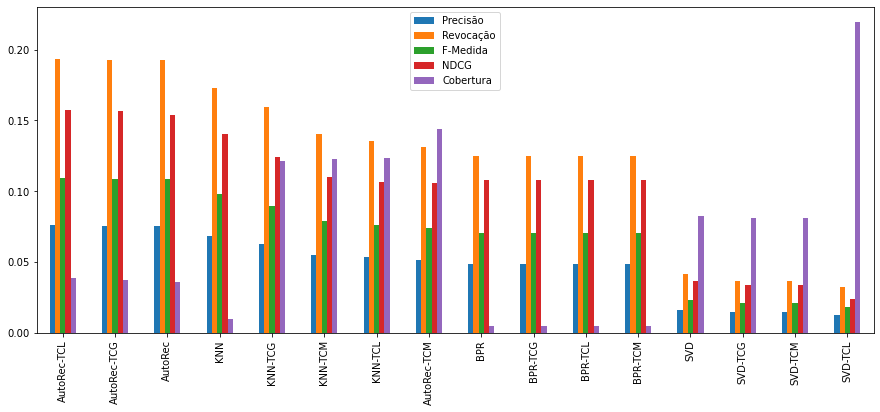

In [81]:
df_results_mean_sorted_3.plot.bar(figsize=(15, 6))
plt.show()

### Análise de resultado dos algoritmos para recomendação top-3

Podemos verificar que o algorítmo **AutoRec COM Taxa de Confiança LOCAL e GLOBAL** apresentaram melhores resultados, mostrando maior Precisão, Revocação, F-Medida e NDCG que os demais. O algoritmo **AutoRec SEM Taxa de Confiaça** apresenta um desempenho muito semelhante e ficou em terceiro lugar. 

O **KNN** apresentou bom resultado ficando em quarto lugar, com diferença de F-Medida de apenas 0.010821 para o terceiro colocado que é algorítmo de AutoRec.

O algoritmo **AutoRec Com Taxa de Confiança Média** ficou em quinto lugar, mostrando que a taxa de confiança média piorou os resultados do AutoRec, mostrando somente uma cobertura melhor que o KNN.

Os algoritmos de **KNN, BPR e SVD sem taxa de confiança** apresentaram medidas melhores do que os mesmos algoritmos com Taxa de Confiança.

Para a Cobertura, o melhor algoritmo foi o **SVD com Taxa de Confiança LOCAL**, entretanto, seu baixo desempenho nas demais métricas mostra que não é um bom algoritmo para a recomendação. Por outro lado, é interessante perceber como a Cobertura para as variações do **KNN COM Taxa de Confiança** aumentaram significativamente sem grandes variações nas métricas de acerto (F-Medida e NDCG), mostrando como pode ser uma opção bastante promissora para cenários onde deseja-se gerar recomendações mais variadas.

---
## Recomendação top-5

#### Ajuste de parâmetros

In [82]:
best_params_5 = adjust_param(5)

testing model KNN
testing model KNN
testing model KNN
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCM
testing model KNN-TCM
testing model KNN-TCM



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM
testing model AutoRec
testing model AutoRec
testing model AutoRec
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCM
testing model AutoRec-TCM
testing model AutoRec-TCM



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM
Ajuste de parâmetros finalizado!


### Melhores parâmetros por modelo para recomendação top-5

In [83]:
show_best_params(best_params_5)

,Algorítmo,Similarity,F-Medida na validação
0,KNN,pearson,0.072711
1,KNN-TCL,jaccard,0.052065
2,KNN-TCG,cosine,0.052065
3,KNN-TCM,jaccard,0.050269


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,SVD,50,0.001,0.019749
1,SVD-TCL,300,0.100,0.031418
2,SVD-TCG,50,0.001,0.023339
3,SVD-TCM,300,0.010,0.027828


,Algorítmo,# da camada oculta,F-Medida na validação
0,AutoRec,50,0.069120
1,AutoRec-TCL,100,0.037702
2,AutoRec-TCG,50,0.009874
3,AutoRec-TCM,300,0.015260


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,BPR,50,0.1,0.05386
1,BPR-TCL,50,0.1,0.05386
2,BPR-TCG,50,0.1,0.05386
3,BPR-TCM,50,0.1,0.05386


### Recomendação top-5 final

In [84]:
results_list_5 = final_prediction(5,10, best_params_5)


Modelos treinados!


### Resultado final da recomendação top-5

Para cada métrica, foi calculada a média entre os resultados para comparação dos algoritmos

In [85]:
df_results_mean_5 = pd.concat(results_list_5).groupby(level=0).mean()
df_results_mean_sorted_5 = df_results_mean_5.sort_values(['F-Medida', 'NDCG'], ascending=False)
display(df_results_mean_sorted_5)

,Precisão,Revocação,F-Medida,NDCG,Cobertura
AutoRec,0.059183,0.250808,0.095767,0.181500,0.048139
AutoRec-TCG,0.058856,0.249423,0.095238,0.181023,0.049239
AutoRec-TCL,0.053460,0.226559,0.086508,0.157135,0.079695
KNN,0.053406,0.226328,0.086420,0.163396,0.013536
KNN-TCG,0.049155,0.208314,0.079541,0.144488,0.167005
KNN-TCL,0.043924,0.186143,0.071076,0.129389,0.168020
KNN-TCM,0.042670,0.180831,0.069048,0.126789,0.168866
AutoRec-TCM,0.041907,0.177598,0.067813,0.125763,0.171235
BPR,0.029428,0.124711,0.047619,0.107814,0.006768
BPR-TCG,0.029428,0.124711,0.047619,0.107814,0.006768


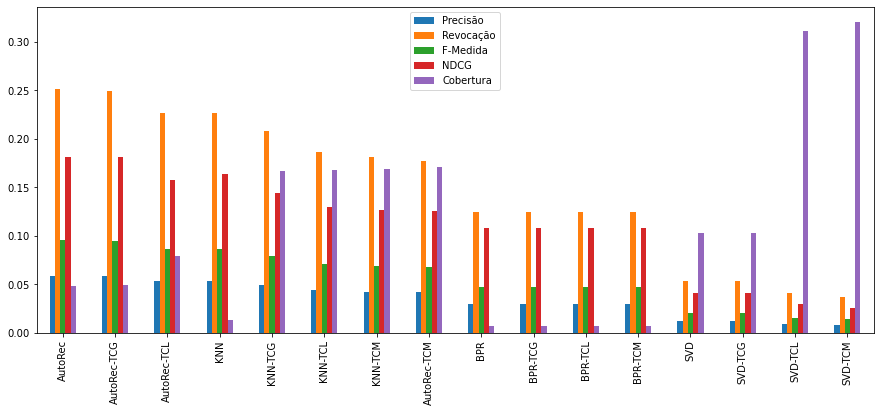

In [86]:
df_results_mean_sorted_5.plot.bar(figsize=(15, 6))
plt.show()

### Análise de resultado dos algoritmos para recomendação top-5

Podemos verificar que o algoritmo **AutoRec sem Taxa de Confiança** apresentou o melhor resultado, mostrando maior F-Medida, NDCG e Cobertura que os demais. O algoritmo **AutoRec com Taxa de Confiaça Global e Local** apresenta um desempenho muito semelhante. O **AutoRec com Taxa de Confiança Global** apresenta uma diferença de apenas 0.000529 para o **AutoRec SEM Taxa de Confiança**

O **KNN** apresentou bom resultado ficando em quarto lugar, com diferença de F-Medida de apenas 0.000088 para o terceiro colocado.

Novamente o algoritmo **AutoRec com Taxa de Confiança Média** piorou os resultados do AutoRec ficando em oitavo lugar.

Os algoritimos de **KNN e BPR sem taxa de confiança** apresentaram medidas melhores do que os mesmos algoritmos com Taxa de Confiança.

Em relação a Cobertura, quase o mesmo cenário que na recomendação top-3 se repetiu, com a diferença do **SVD com Taxa de Confiança Global** gerando as recomendações mais variadas.

---
## Recomendação top-10

#### Ajuste de parâmetros

In [87]:
best_params_10 = adjust_param(10)

testing model KNN
testing model KNN
testing model KNN
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCL
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCG
testing model KNN-TCM
testing model KNN-TCM
testing model KNN-TCM



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCL



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCG



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM



testing model SVD-TCM
testing model AutoRec
testing model AutoRec
testing model AutoRec
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCL
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCG
testing model AutoRec-TCM
testing model AutoRec-TCM
testing model AutoRec-TCM



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCL



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCG



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM



testing model BPR-TCM
Ajuste de parâmetros finalizado!


### Melhores parâmetros por modelo para recomendação top-10

In [88]:
show_best_params(best_params_10)

,Algorítmo,Similarity,F-Medida na validação
0,KNN,pearson,0.056534
1,KNN-TCL,jaccard,0.047607
2,KNN-TCG,cosine,0.050583
3,KNN-TCM,jaccard,0.048103


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,SVD,50,0.001,0.017853
1,SVD-TCL,300,0.100,0.025291
2,SVD-TCG,50,0.100,0.018845
3,SVD-TCM,50,0.010,0.022316


,Algorítmo,# da camada oculta,F-Medida na validação
0,AutoRec,50,0.058517
1,AutoRec-TCL,100,0.034714
2,AutoRec-TCG,50,0.008430
3,AutoRec-TCM,100,0.021820


,Algorítmo,N Fatores,Regularização,F-Medida na validação
0,BPR,100,0.1,0.040665
1,BPR-TCL,100,0.1,0.040665
2,BPR-TCG,100,0.1,0.040665
3,BPR-TCM,100,0.1,0.040665


### Recomendação top-10 final

In [89]:
results_list_10 = final_prediction(10,10, best_params_10)


Modelos treinados!


### Resultado final da recomendação top-10

Para cada métrica, foi calculada a média entre os resultados para comparação dos algoritmos

In [90]:
df_results_mean_10 = pd.concat(results_list_10).groupby(level=0).mean()
df_results_mean_sorted_10 = df_results_mean_10.sort_values(['F-Medida', 'NDCG'], ascending=False)
display(df_results_mean_sorted_10)

,Precisão,Revocação,F-Medida,NDCG,Cobertura
AutoRec-TCG,0.040599,0.344111,0.072630,0.211495,0.074619
AutoRec,0.040545,0.343649,0.072532,0.212495,0.075296
AutoRec-TCM,0.038229,0.324018,0.068389,0.191765,0.114721
AutoRec-TCL,0.037684,0.319400,0.067414,0.191204,0.113706
KNN,0.037057,0.314088,0.066293,0.193797,0.020305
KNN-TCG,0.035422,0.300231,0.063368,0.175637,0.280880
KNN-TCL,0.031989,0.271132,0.057226,0.158163,0.269205
KNN-TCM,0.031362,0.265820,0.056105,0.156109,0.268528
BPR,0.024796,0.210162,0.044358,0.138206,0.013536
BPR-TCG,0.024796,0.210162,0.044358,0.138206,0.013536


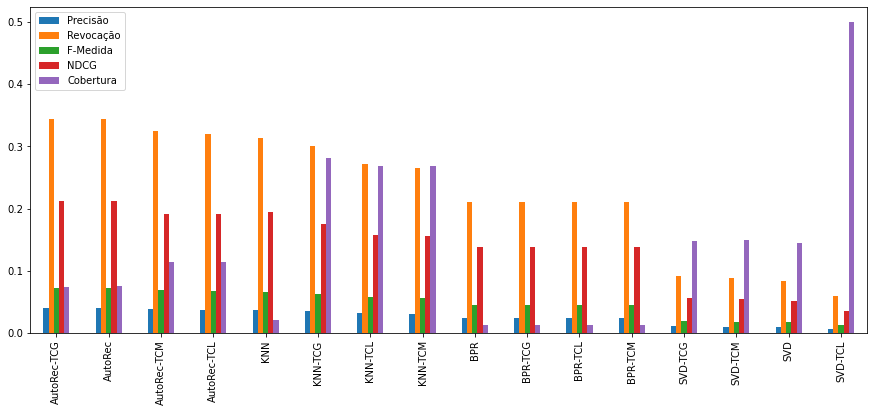

In [91]:
df_results_mean_sorted_10.plot.bar(figsize=(15, 6))
plt.show()

### Análise de resultado dos algoritmos para recomendação top-10

Podemos verificar que o algoritmo **AutoRec com Taxa de Confiança GLOBAL** apresentou o melhor resultado de F-Medida que o algorítmo **AutoRec sem Taxa de Confiança**, mas em contrapartida o algorítmo **AutoRec sem Taxa de Confiança** apresentou melhor NDCG e Cobertura.

O **AutoRec** aparece em segundo lugar, com medidas muito próximas as dos AutoRec com Taxa de Confiança Global. 

O **KNN** continuou apresentou boms resultados, ficando em quinto lugar, com diferença de F-Medida de apenas 0.001121 para o quarto colocado.

Os algoritimos de **KNN e BPR** continua apresentando medidas melhores do que os mesmos algoritmos com Taxa de Confiança. Em contrapartida, o algoritimo de **SVD** com Taxa de confiança Global e Média apresentou melhor F-Medida que o **SVD** sem taxa de confiança.

### Comparando a Precisão entre os resultados obtidos com a recomendação de 3, 5 e 10 jogos respectivamente

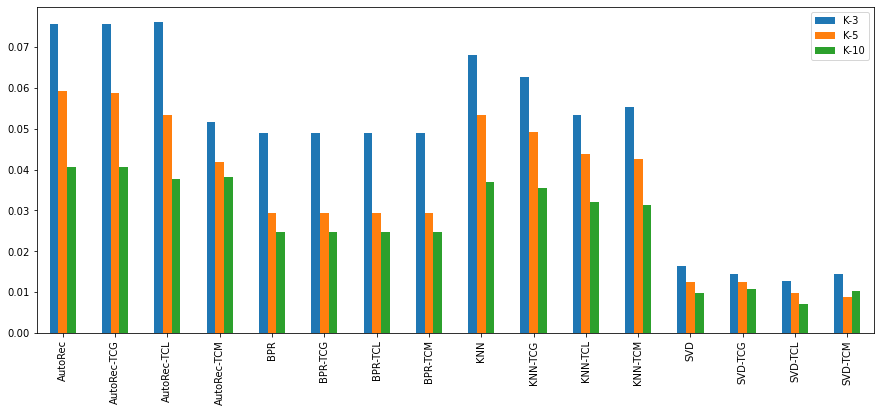

In [92]:
df_results_all = pd.DataFrame({
    'K-3': df_results_mean_sorted_3['Precisão'],
    'K-5': df_results_mean_sorted_5['Precisão'],
    'K-10': df_results_mean_sorted_10['Precisão']
})
df_results_all.plot.bar(figsize=(15, 6))
plt.show()

### Análise do resultado da Precisão para algoritmos com 3, 5 e 10 recomendações

O algoritmo **AutoRec com Taxa de Confiança Local** apresentou maior taxa de Precisão para recomendação de 3 jogos, seguido pelo **AutoRec com Taxa de Confiança Global e AutoRec sem Taxa de Confiança**.

O algoritmo **AutoRec com Taxa de Confiança Global e AutoRec sem Taxa de Confiança** apresentaram maior taxa de Precisão para recomendação de 5 e 10 jogos, seguidos pelo **AutoRec com Taxa de Confiança Local**.

Vemos que os algoritmos de **KNN com e sem Taxa de Confiança** apresentaram resultados superiores aos dos obtidos pelos algoritmos de **BPR e SVD com e sem Taxa de Confiança**

Vemos claramente pelo gráfico que a precisão obtida na recomendação de 3 jogos foi superior aos respectivos algoritmos com recomendação de 5 e 10 jogos. A precisão dos algoritmos de recomendação de 5 jogos foram superiores aos respectivos algoritmos de 10 jogos.

### Comparando a Revocação entre os resultados obtidos com a recomendação de 3, 5 e 10 jogos respectivamente

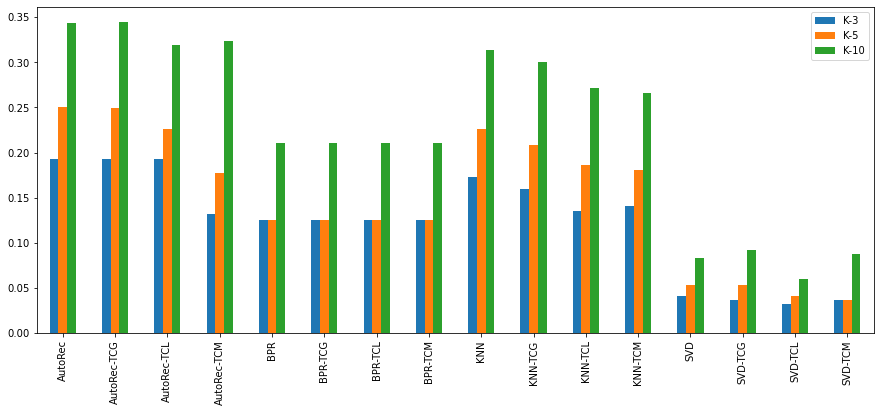

In [93]:
df_results_all = pd.DataFrame({
    'K-3': df_results_mean_sorted_3['Revocação'],
    'K-5': df_results_mean_sorted_5['Revocação'],
    'K-10': df_results_mean_sorted_10['Revocação']
})
df_results_all.plot.bar(figsize=(15, 6))
plt.show()

### Análise do resultado da Revocação para algoritmos com 3, 5 e 10 recomendações

Como esperado todos os algoritmos apresentaram melhor taxa de Revocação com recomendação de 10 jogos do que os mesmos algoritmos com recomendação de 5 e 3 jogos respectivamente. Resultado contrário ao que foi obtido na medida de Precião onde os melhores resultados ficaram para as recomendaçãoes de 3 e 5 jogos respectivamente

O algoritmo de **AutoRec com Taxa de confiança Global e sem Taxa de Confiança** apresentaram os melhores resultados de Revocação.

Assim como na avaliação de Precisão o algorítmo de KNN ficou logo em seguida apresentando bons resultados ao algoritmos de **BPR e SVD com e sem Taxa de Confiança**

### Comparando a F-Medida entre os resultados obtidos com a recomendação de 3, 5 e 10 jogos respectivamente

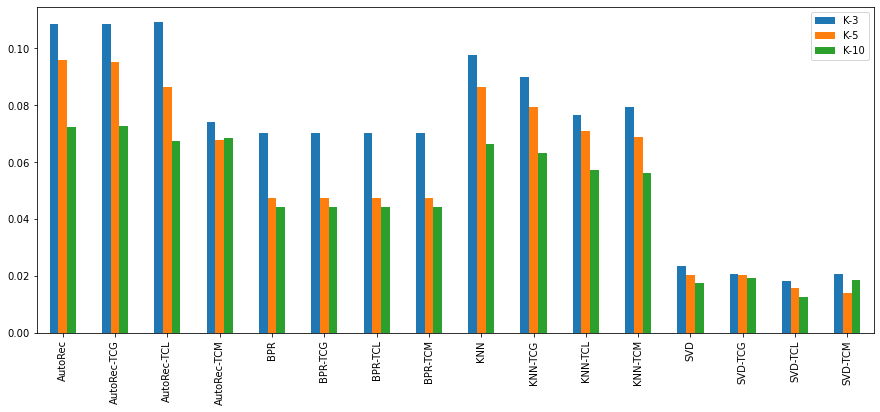

In [94]:
df_results_all = pd.DataFrame({
    'K-3': df_results_mean_sorted_3['F-Medida'],
    'K-5': df_results_mean_sorted_5['F-Medida'],
    'K-10': df_results_mean_sorted_10['F-Medida']
})
df_results_all.plot.bar(figsize=(15, 6))
plt.show()

### Análise do resultado da F-Medida para algoritmos com 3, 5 e 10 recomendações

A F-Medida procura mostar de forma única as medidas de Precisão e Revocação, calculando uma média harmônica entre as duas métricas. O resultado final apresentou valores maiores de F-Medida para os algoritmos de **AutoRec com diferentes Taxas de Confiança Local, Global e sem Taxa de Confiança** para todos os cenários de recomendação avaliados.

O algorítmo de **KNN com e sem Taxa de Confiança** apresentou novamente bons resultados.

A F-Medida dos algorítomos com recomendação de 3 jogos foram as melhores, seguidas pelas recomendações de 5 e 10 jogos

### Comparando o NDCG entre os resultados obtidos com a recomendação de 3, 5 e 10 jogos respectivamente

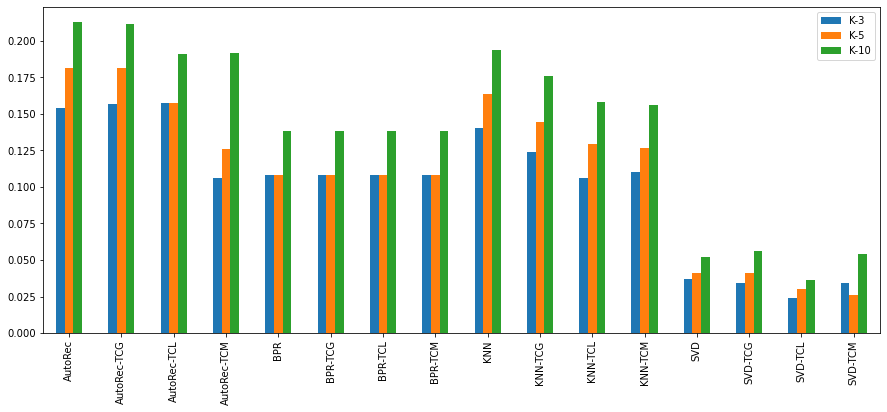

In [95]:
df_results_all = pd.DataFrame({
    'K-3': df_results_mean_sorted_3['NDCG'],
    'K-5': df_results_mean_sorted_5['NDCG'],
    'K-10': df_results_mean_sorted_10['NDCG']
})
df_results_all.plot.bar(figsize=(15, 6))
plt.show()

### Análise do resultado do NDCG para algoritmos com 3, 5 e 10 recomendações

Ao analisarmos a qualidade da ordenação, os algoritmos com 10 recomendações mostraram-se melhores. O **AutoRec com Taxa de Confiança Global e sem Taxa de Confiança** mostraram-se superiores, seguidos do mesmo algoritmo com **Taxas de Confiança Local e Taxa de Confiança Média**.

O KNN, como nas outras medidas, vem logo atrás ao AutoRec, com valores altos para as métricas e apresentando o mesmo comportamento de melhor NDCG para recomendação de 10, 5 e 3 jogos, respectivamente.

### Comparando Cobertura entre os resultados obtidos com a recomendação de 3, 5 e 10 jogos respectivamente

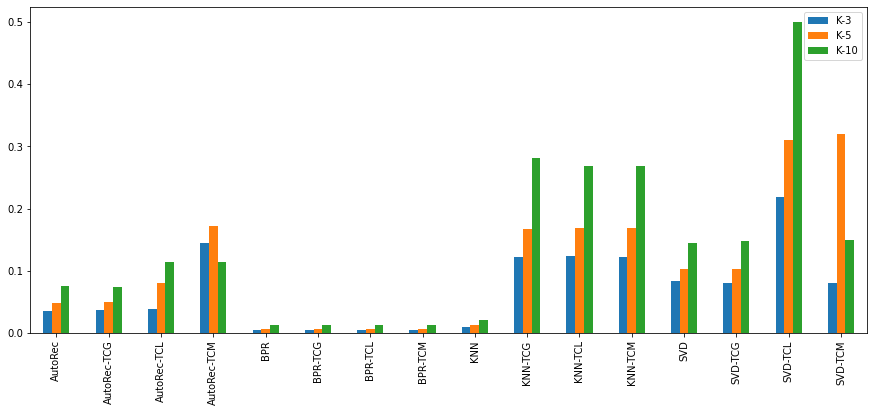

In [96]:
df_results_all = pd.DataFrame({
    'K-3': df_results_mean_sorted_3['Cobertura'],
    'K-5': df_results_mean_sorted_5['Cobertura'],
    'K-10': df_results_mean_sorted_10['Cobertura']
})
df_results_all.plot.bar(figsize=(15, 6))
plt.show()

### Análise do resultado da Cobertura para algoritmos com 3, 5 e 10 recomendações

É interessante observar que o algoritmo do **SVD COM Taxa de Confiança Local** apresentou uma variação muito acima dos outros algorítmos para recomendação de 10, 5 e 3 jogos respectivamente, seguido pelo **SVD com Taxa de confiança Média** que apresentou melhor cobertura para recomendação de 5 jogos.

Logo em seguida vemos o algorítmo do **KNN com Taxa de Confiança Global, Local e Média** que apresentaram bons resultados e se destacaram apresentando resultados superiores aos obtidos pelo **KNN sem Taxa de Confiança**

O algoritmo de **AutoRec com Taxa de Confiança Média** se destacou quando comparado com os algoritmos **AutoRec com Taxa de Confiança Local, Global e sem Taxa de Confiança**

# Conclusão

Nesse trabalho, foi construído um sistema de recomendação de jogos eletrônicos. A base de dados da plataforma online Steam foi amplamente explorada, e experimentos foram conduzidos para avaliar diferentes cenários de recomendação. Adicionalmente, foi proposta uma maneira de quantificar as interações de forma explícita, através de taxas de confiança.

As Taxas de Confianças foram calculadas com base nas horas jogadas pelo jogador em diferente jogos, e em jogos jogados por diferentes usuários, afim de se obter uma confiança maior no grau de satisfação entre um usuário e um jogo previamente consumido. As taxas de confiança pioneiramente propostas e apresentadas neste trabalho se mostraram não interferir nos resultados atingidos pelo algoritmo AutoRec, alcançando os basicamente os mesmos resultados resutlados que os mesmos algorítmos sem taxa de confiança, para diversas métricas. A única métrica em que a taxa de confiaça mostrou melhora significativa nos resultados foi a Cobertura.

Foram explorados quatro algoritmos de recomendação implícita diferentes, utilizando as bibliotecas `turicreate`, `implicit` e `keras`: o KNN, o SVD, o uso de Auto-Encoders para recomendação (AutoRec) e o Bayesian Personalized Ranking (BPR). Todos foram executados com e sem o uso da Taxa de Confiança, em cenários de recomendação top-$N$ para 3, 5 e 10 jogos. Para gerar maior confiança nos resultados e reduzir a aleatoriedade das execuções, cada algoritmo foi executado 10 vezes, com inicializações diferentes, com as métricas finais sendo calculadas através da média entre cada execução.

Através dos resultados, foi verificado que o uso de uma **Taxa de Confiança** não foi capaz de **melhorar** os algoritmos de modo geral, mas apresentou os melhores resultados para a recomendação top-3. Por outro lado, ficou evidente que a taxa de confiança introduz mais variação na Cobertura das recomendações, não prejudicando a qualidade da recomendação em relação ao mesmo algoritmo sem taxa de confiança. Assim, em cenários onde deseja-se aumentar a abrangência das recomendações, sem interferir na qualidade das mesmas, o uso das taxas de confiança propostas podem ser muito interessantes.


## Trabalhos Futuros

Como trabalho futuro, sugere-se a adição de dados de conteúdo dos jogos nos algoritmos aqui executados, com o objetivo de melhorar os resultados. Informações como gênero dos jogos (_genre_), classificação dada pelos usuários (_recent_reviews_, _all_reviews_), marcações (_popular_tags_), detalhes dos jogos (_game_details_), descrição dos jogos (_game_description_), classificação indicativa do conteúdo (_mature_content_) e preço (_original_price_), podem agregar maior informação para serem aprendidas pelos modelos.

Adicionalmente, podem ser usadas técnicas de Processamento de Linguagem Natural (PLN) para extração de informações úteis dos campos _game_description_, que podem ser consumidas pelos modelos numa tentativa de melhorar ainda mais os resultados de recomendação.

### Referências

(AGUNG, 2020): M. B. Agung, "Steam Dataset Visualization". Disponível em: <https://kaggle.com/muhammadbangunagung/steam-dataset-visualization>. Acesso em 31 de Março de 2021.

(ARASANIPALAI, 2019): A. Arasanipalai, "How companies use collaborative filtering to learn exactly what you want". Disponível em: <https://medium.com/free-code-camp/how-companies-use-collaborative-filtering-to-learn-exactly-what-you-want-a3fc58e22ad9>. Acesso em 31 de Março de 2021.

(BAIBAK, 2020): D. Baibak, "Building recommendation system based Bayesian Personalized Ranking using TensorFlow 2.1". Disponível em: <https://medium.com/heyjobs-tech/building-recommendation-system-based-bayesian-personalized-ranking-using-tensorflow-2-1-b814d2704130>. Acesso em 31 de Março de 2021.

(BERTENS, 2018): P. Bertens, A. Guitart, P. P. Chen \& A. Perianez, "A Machine-Learning Item Recommendation System for Video Games". _In: 2018 IEEE Conference on Computational Intelligence and Games (CIG)_, Maastricht, Netherlands, 2018, pp. 1-4. DOI: 10.1109/CIG.2018.8490456.

(BHATTACHARYYA, 2019): M. Bhattacharyya, "Beginner’s Guide to Creating the SVD Recommender System". Disponível em: <https://towardsdatascience.com/beginners-guide-to-creating-an-svd-recommender-system-1fd7326d1f65>. Acesso em 31 de Março de 2021.

(CANO, 2019): A. Cano, "Recommender Systems and Hyper-parameter tuning". Disponível em: <https://towardsdatascience.com/recommender-systems-and-hyper-parameter-tuning-25567b10e298>. Acesso em 31 de Março de 2021.

(CHEUQUE _et al._, 2019): G. Cheuque, J. Guzmán \& Denis Parra, "Recommender Systems for Online Video Game Platforms: the Case of STEAM". _In: Companion Proceedings of The 2019 World Wide Web Conference (WWW '19)_. Association for Computing Machinery, New York, NY, USA, 2019, 763–771. DOI: 10.1145/3308560.3316457.

(FIELD LEVEL MEDIA, 2020): Field Level Media, "Report: Gaming revenue to top \$159B in 2020". Disponível em: <https://www.reuters.com/article/esports-business-gaming-revenues-idUSFLM8jkJMl>. Acesso em 31 de Março de 2021.

(GLEN, 2021): s. Glen, "Correlation Coefficient: Simple Definition, Formula, Easy Steps". Disponível em: <https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/>. Acesso em 31 de Março de 2021.

(HU _et al._, 2008): Y. Hu, Y. Koren \& C. Volinsky, "Collaborative Filtering for Implicit Feedback Datasets". _In: 8th IEEE International Conference on Data Mining_, Pisa, Italy, 2008, pp. 263-272. DOI: 10.1109/ICDM.2008.22.

(HYODAN _et al._, 2020): D. Hyodan, A. Germain \& G. Jove, "Recommendation System for Steam Game Store: An overview of recommender systems". Disponível em: <https://audreygermain.github.io/Game-Recommendation-System/>. Acesso em 31 de Março de 2021.

(JAVED, 2020): M. Javed, "Using Cosine Similarity to Build a Movie Recommendation System". Disponível em: <https://towardsdatascience.com/using-cosine-similarity-to-build-a-movie-recommendation-system-ae7f20842599>. Acesso em 31 de Março de 2021.

(KAMAL _et al._, 2020): A. S. b. Ahmad Kamal, S. Saaidin \& M. Kassim, "Recommender System: Rating predictions of Steam Games Based on Genre and Topic Modelling". _In: 2020 IEEE International Conference on Automatic Control and Intelligent Systems (I2CACIS)_, Shah Alam, Malaysia, 2020, pp. 212-218. DOI: 10.1109/I2CACIS49202.2020.9140194.

(KARABIBER, 2021): F. Karabiber, "Jaccard Similarity". Disponível em: <https://www.learndatasci.com/glossary/jaccard-similarity/>. Acesso em 31 de Março de 2021.

(MAKWANA, 2020): A. Makwana, "Understanding Recommendation system and KNN with project — Book Recommendation System". Disponível em: <https://aman-makwana101932.medium.com/understanding-recommendation-system-and-knn-with-project-book-recommendation-system-c648e47ff4f6>. Acesso em 31 de Março de 2021.

(MIX, 2020): Mix, "Steam rolls out new feature to help you decide what game to play next". Disponível em: <https://thenextweb.com/apps/2020/02/14/steam-play-next-recommendation-algorithm/>. Acesso em 31 de Março de 2021.

(NAGI, 2020): K. Nagi, "Collaborative-Filtering versus Content-based RS". Disponível em: <https://krithikanagi.medium.com/collaborative-filtering-versus-content-based-rs-590a2ec8e7b7>. Acesso em 31 de Março de 2021.

(ROBERTSON, 2019): A. Robertson, "Steam's new Interactive Recommender is built for finding 'hidden gems'". Disponível em: <https://www.theverge.com/2019/7/11/20690231/valve-steam-labs-interactive-recommender-game-recommendation-machine-learning-tool>. Acesso em 31 de Março de 2021.

(SEDHAIN _et al._, 2015): S. Sedhain, A. K. Menon, S. Sanner \& L. Xie. "AutoRec: Autoencoders Meet Collaborative Filtering". _In: Proceedings of the 24th International Conference on World Wide Web (WWW '15 Companion)_. Association for Computing Machinery, New York, NY, USA, 2015, pp. 111–112. DOI: 10.1145/2740908.2742726.

(SIMON, 2017): Simon, "Steam Game Analysis". Disponível em: <https://www.kaggle.com/simonprevoteaux/steam-game-analysis>. Acesso em 31 de Março de 2021.

(SYAFALDI, 2021): Syafaldi R, "Recommender System". Disponível em: <https://www.kaggle.com/syafaldir/recomender-sytem>. Acesso em 31 de Março de 2021.